In [1]:
from utils import *

%load_ext autoreload
%autoreload 2

In [3]:
import pickle 

with open('./sk_trainers.bin', 'rb') as trainerfile:
    sk_trainers = pickle.load(trainerfile)
    
with open('./cbow_trainers.bin', 'rb') as trainerfile:
    cbow_trainers = pickle.load(trainerfile)

## Notas

* Yo necesito que las siguientes partes del trainer estén separadas:

    * La generación de muestras (con batches?) y la definición del modelo
    * La inicilización de los parámetros
    * El traslado del modelo y/o las muestras al device
    * El train

# Modelos de lenguaje Neuronales

## Entrenamiento con las frases de Train de Latino40

In [11]:
#corpus = [['w1', 'w2', 'w3', 'w4'], ['w1', 'w3', 'w3', 'w3'], ['w1'], ['w1', 'w2', 'w3', 'w4', 'w1', 'w2', 'w3', 'w4']]
corpus = GetTrainCorpus('./promptsl40.train')
cutoff_freq = 0
window_size_list = [1, 2, 3, 4, 5, 6, 7, 8]
batch_size = 512

state_dict = None
device = 'cuda:1'
paralelize = False
embedding_dim_list = [50, 100, 150, 200, 300, 400]

sk_trainers = []
for window_size in window_size_list:
    embedding_dim_trainers = []
    for embedding_dim in embedding_dim_list:
        sk_trainer = SkipGramTrainer(corpus, cutoff_freq, window_size, batch_size)
        sk_trainer.InitModel(state_dict=state_dict, device=device, paralelize=paralelize, embedding_dim=embedding_dim)
        embedding_dim_trainers.append(sk_trainer)
    sk_trainers.append(embedding_dim_trainers)

SkipGram trainer created:
Window size: 1
Number of samples: 38728
Vocabulary Size: 5365
Number of batches: 76
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 50
SkipGram trainer created:
Window size: 1
Number of samples: 38728
Vocabulary Size: 5365
Number of batches: 76
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 100
SkipGram trainer created:
Window size: 1
Number of samples: 38728
Vocabulary Size: 5365
Number of batches: 76
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 150
SkipGram trainer created:
Window size: 1
Number of samples: 38728
Vocabulary Size: 5365
Number of batches: 76
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 200
SkipGram trainer created:
Window size: 1
Number of samples: 38728
Vocabulary Size: 5365
Number of batches: 76
Num

SkipGram trainer created:
Window size: 7
Number of samples: 38728
Vocabulary Size: 5365
Number of batches: 76
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 100
SkipGram trainer created:
Window size: 7
Number of samples: 38728
Vocabulary Size: 5365
Number of batches: 76
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 150
SkipGram trainer created:
Window size: 7
Number of samples: 38728
Vocabulary Size: 5365
Number of batches: 76
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 200
SkipGram trainer created:
Window size: 7
Number of samples: 38728
Vocabulary Size: 5365
Number of batches: 76
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 300
SkipGram trainer created:
Window size: 7
Number of samples: 38728
Vocabulary Size: 5365
Number of batches: 76
Nu

In [12]:
algorithm = 'Adam'
epochs = 300
sample_loss_every = 100
learning_rate = 5e-4

for trainer_list in sk_trainers:
    for trainer in trainer_list:
        trainer.Train(algorithm=algorithm, epochs=epochs, sample_loss_every=sample_loss_every, lr=learning_rate)

Starting training...
Optimization method: Adam
Learning Rate: 0.0005
Number of epochs: 300
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 8030.67626953125
Epoch: 2, Batch number: 24, Loss: 7778.5224609375
Epoch: 3, Batch number: 48, Loss: 7660.98681640625
Epoch: 4, Batch number: 72, Loss: 7413.61376953125
Epoch: 6, Batch number: 20, Loss: 7072.8935546875
Epoch: 7, Batch number: 44, Loss: 7066.8876953125
Epoch: 8, Batch number: 68, Loss: 6857.48095703125
Epoch: 10, Batch number: 16, Loss: 6450.0283203125
Epoch: 11, Batch number: 40, Loss: 6592.77001953125
Epoch: 12, Batch number: 64, Loss: 6526.9814453125
Epoch: 14, Batch number: 12, Loss: 6293.771484375
Epoch: 15, Batch number: 36, Loss: 6032.1875
Epoch: 16, Batch number: 60, Loss: 6055.12646484375
Epoch: 18, Batch number: 8, Loss: 5971.427734375
Epoch: 19, Batch number: 32, Loss: 5938.4287109375
Epoch: 20, Batch number: 56, Loss: 5773.2060546875
Epoch: 22, Batch number: 4, Loss: 5810.70849609375
Epoch: 23, Batch number: 

Epoch: 206, Batch number: 20, Loss: 3356.16845703125
Epoch: 207, Batch number: 44, Loss: 3363.999267578125
Epoch: 208, Batch number: 68, Loss: 3426.956787109375
Epoch: 210, Batch number: 16, Loss: 3460.0888671875
Epoch: 211, Batch number: 40, Loss: 3441.960693359375
Epoch: 212, Batch number: 64, Loss: 3343.122314453125
Epoch: 214, Batch number: 12, Loss: 3322.14794921875
Epoch: 215, Batch number: 36, Loss: 3223.489990234375
Epoch: 216, Batch number: 60, Loss: 3274.672607421875
Epoch: 218, Batch number: 8, Loss: 3516.762451171875
Epoch: 219, Batch number: 32, Loss: 3451.792724609375
Epoch: 220, Batch number: 56, Loss: 3235.129150390625
Epoch: 222, Batch number: 4, Loss: 3147.301513671875
Epoch: 223, Batch number: 28, Loss: 3229.815673828125
Epoch: 224, Batch number: 52, Loss: 3402.410888671875
Epoch: 226, Batch number: 0, Loss: 3356.888427734375
Epoch: 227, Batch number: 24, Loss: 3182.70361328125
Epoch: 228, Batch number: 48, Loss: 3385.10498046875
Epoch: 229, Batch number: 72, Loss: 3

Epoch: 108, Batch number: 68, Loss: 3299.842529296875
Epoch: 110, Batch number: 16, Loss: 3214.678955078125
Epoch: 111, Batch number: 40, Loss: 3318.345947265625
Epoch: 112, Batch number: 64, Loss: 3271.87744140625
Epoch: 114, Batch number: 12, Loss: 3385.904052734375
Epoch: 115, Batch number: 36, Loss: 3273.841796875
Epoch: 116, Batch number: 60, Loss: 3308.88427734375
Epoch: 118, Batch number: 8, Loss: 3283.134033203125
Epoch: 119, Batch number: 32, Loss: 3356.568359375
Epoch: 120, Batch number: 56, Loss: 3252.722412109375
Epoch: 122, Batch number: 4, Loss: 3248.814453125
Epoch: 123, Batch number: 28, Loss: 3209.739990234375
Epoch: 124, Batch number: 52, Loss: 3468.196533203125
Epoch: 126, Batch number: 0, Loss: 3236.68896484375
Epoch: 127, Batch number: 24, Loss: 3304.306884765625
Epoch: 128, Batch number: 48, Loss: 3324.38037109375
Epoch: 129, Batch number: 72, Loss: 3349.521240234375
Epoch: 131, Batch number: 20, Loss: 3194.63232421875
Epoch: 132, Batch number: 44, Loss: 3453.6870

Epoch: 11, Batch number: 40, Loss: 5643.5380859375
Epoch: 12, Batch number: 64, Loss: 5431.52490234375
Epoch: 14, Batch number: 12, Loss: 5230.212890625
Epoch: 15, Batch number: 36, Loss: 5156.35546875
Epoch: 16, Batch number: 60, Loss: 4864.15625
Epoch: 18, Batch number: 8, Loss: 4855.09033203125
Epoch: 19, Batch number: 32, Loss: 4614.7841796875
Epoch: 20, Batch number: 56, Loss: 4489.01708984375
Epoch: 22, Batch number: 4, Loss: 4454.41259765625
Epoch: 23, Batch number: 28, Loss: 4446.154296875
Epoch: 24, Batch number: 52, Loss: 4428.8046875
Epoch: 26, Batch number: 0, Loss: 4182.6767578125
Epoch: 27, Batch number: 24, Loss: 4151.59521484375
Epoch: 28, Batch number: 48, Loss: 4122.302734375
Epoch: 29, Batch number: 72, Loss: 4224.4453125
Epoch: 31, Batch number: 20, Loss: 4007.268310546875
Epoch: 32, Batch number: 44, Loss: 4108.00927734375
Epoch: 33, Batch number: 68, Loss: 4031.45849609375
Epoch: 35, Batch number: 16, Loss: 3892.5458984375
Epoch: 36, Batch number: 40, Loss: 3823.1

Epoch: 219, Batch number: 32, Loss: 3161.0810546875
Epoch: 220, Batch number: 56, Loss: 3411.954345703125
Epoch: 222, Batch number: 4, Loss: 3107.835205078125
Epoch: 223, Batch number: 28, Loss: 3265.247314453125
Epoch: 224, Batch number: 52, Loss: 3241.4501953125
Epoch: 226, Batch number: 0, Loss: 3277.532470703125
Epoch: 227, Batch number: 24, Loss: 3176.315185546875
Epoch: 228, Batch number: 48, Loss: 3333.126708984375
Epoch: 229, Batch number: 72, Loss: 3196.651123046875
Epoch: 231, Batch number: 20, Loss: 3211.433349609375
Epoch: 232, Batch number: 44, Loss: 3115.51171875
Epoch: 233, Batch number: 68, Loss: 3181.314453125
Epoch: 235, Batch number: 16, Loss: 3196.893310546875
Epoch: 236, Batch number: 40, Loss: 3214.510986328125
Epoch: 237, Batch number: 64, Loss: 3157.139404296875
Epoch: 239, Batch number: 12, Loss: 3143.700927734375
Epoch: 240, Batch number: 36, Loss: 3224.060791015625
Epoch: 241, Batch number: 60, Loss: 3342.64306640625
Epoch: 243, Batch number: 8, Loss: 3007.70

Epoch: 123, Batch number: 28, Loss: 3143.684814453125
Epoch: 124, Batch number: 52, Loss: 3242.466064453125
Epoch: 126, Batch number: 0, Loss: 3144.481201171875
Epoch: 127, Batch number: 24, Loss: 3113.004150390625
Epoch: 128, Batch number: 48, Loss: 3226.072265625
Epoch: 129, Batch number: 72, Loss: 3191.55615234375
Epoch: 131, Batch number: 20, Loss: 3134.431884765625
Epoch: 132, Batch number: 44, Loss: 3241.7861328125
Epoch: 133, Batch number: 68, Loss: 3306.25
Epoch: 135, Batch number: 16, Loss: 3122.4892578125
Epoch: 136, Batch number: 40, Loss: 3262.59375
Epoch: 137, Batch number: 64, Loss: 3340.421875
Epoch: 139, Batch number: 12, Loss: 3175.990234375
Epoch: 140, Batch number: 36, Loss: 3207.231689453125
Epoch: 141, Batch number: 60, Loss: 3318.614501953125
Epoch: 143, Batch number: 8, Loss: 3277.122314453125
Epoch: 144, Batch number: 32, Loss: 3329.23046875
Epoch: 145, Batch number: 56, Loss: 3266.40234375
Epoch: 147, Batch number: 4, Loss: 3115.437255859375
Epoch: 148, Batch n

Epoch: 27, Batch number: 24, Loss: 3652.281982421875
Epoch: 28, Batch number: 48, Loss: 3608.4140625
Epoch: 29, Batch number: 72, Loss: 3796.44921875
Epoch: 31, Batch number: 20, Loss: 3445.804931640625
Epoch: 32, Batch number: 44, Loss: 3445.406982421875
Epoch: 33, Batch number: 68, Loss: 3570.217041015625
Epoch: 35, Batch number: 16, Loss: 3487.60107421875
Epoch: 36, Batch number: 40, Loss: 3443.462646484375
Epoch: 37, Batch number: 64, Loss: 3486.103515625
Epoch: 39, Batch number: 12, Loss: 3360.364990234375
Epoch: 40, Batch number: 36, Loss: 3443.603271484375
Epoch: 41, Batch number: 60, Loss: 3572.364501953125
Epoch: 43, Batch number: 8, Loss: 3299.8330078125
Epoch: 44, Batch number: 32, Loss: 3376.684814453125
Epoch: 45, Batch number: 56, Loss: 3358.038818359375
Epoch: 47, Batch number: 4, Loss: 3258.233642578125
Epoch: 48, Batch number: 28, Loss: 3376.373291015625
Epoch: 49, Batch number: 52, Loss: 3240.24169921875
Epoch: 51, Batch number: 0, Loss: 3270.810546875
Epoch: 52, Batc

Epoch: 232, Batch number: 44, Loss: 3238.28955078125
Epoch: 233, Batch number: 68, Loss: 3207.71728515625
Epoch: 235, Batch number: 16, Loss: 3133.994873046875
Epoch: 236, Batch number: 40, Loss: 3215.276123046875
Epoch: 237, Batch number: 64, Loss: 3363.839111328125
Epoch: 239, Batch number: 12, Loss: 3158.80224609375
Epoch: 240, Batch number: 36, Loss: 3205.058349609375
Epoch: 241, Batch number: 60, Loss: 3321.3828125
Epoch: 243, Batch number: 8, Loss: 2993.469970703125
Epoch: 244, Batch number: 32, Loss: 3267.669189453125
Epoch: 245, Batch number: 56, Loss: 3237.753173828125
Epoch: 247, Batch number: 4, Loss: 3154.94482421875
Epoch: 248, Batch number: 28, Loss: 3248.494873046875
Epoch: 249, Batch number: 52, Loss: 3178.606689453125
Epoch: 251, Batch number: 0, Loss: 3178.366943359375
Epoch: 252, Batch number: 24, Loss: 3240.0927734375
Epoch: 253, Batch number: 48, Loss: 3249.34814453125
Epoch: 254, Batch number: 72, Loss: 3187.884033203125
Epoch: 256, Batch number: 20, Loss: 3158.22

Epoch: 135, Batch number: 16, Loss: 3124.93310546875
Epoch: 136, Batch number: 40, Loss: 3237.58984375
Epoch: 137, Batch number: 64, Loss: 3339.762939453125
Epoch: 139, Batch number: 12, Loss: 3202.705810546875
Epoch: 140, Batch number: 36, Loss: 3198.29931640625
Epoch: 141, Batch number: 60, Loss: 3182.290771484375
Epoch: 143, Batch number: 8, Loss: 3047.377197265625
Epoch: 144, Batch number: 32, Loss: 3148.760009765625
Epoch: 145, Batch number: 56, Loss: 3467.434814453125
Epoch: 147, Batch number: 4, Loss: 3173.24853515625
Epoch: 148, Batch number: 28, Loss: 3391.103759765625
Epoch: 149, Batch number: 52, Loss: 3420.861572265625
Epoch: 151, Batch number: 0, Loss: 3155.928955078125
Epoch: 152, Batch number: 24, Loss: 3201.55517578125
Epoch: 153, Batch number: 48, Loss: 3229.9248046875
Epoch: 154, Batch number: 72, Loss: 3463.863037109375
Epoch: 156, Batch number: 20, Loss: 3263.87548828125
Epoch: 157, Batch number: 44, Loss: 3245.53759765625
Epoch: 158, Batch number: 68, Loss: 3280.0


Epoch: 39, Batch number: 12, Loss: 9672.78125
Epoch: 40, Batch number: 36, Loss: 9806.703125
Epoch: 41, Batch number: 60, Loss: 9967.07421875
Epoch: 43, Batch number: 8, Loss: 9735.8447265625
Epoch: 44, Batch number: 32, Loss: 9873.1845703125
Epoch: 45, Batch number: 56, Loss: 9593.8974609375
Epoch: 47, Batch number: 4, Loss: 9590.404296875
Epoch: 48, Batch number: 28, Loss: 9518.486328125
Epoch: 49, Batch number: 52, Loss: 9552.1318359375
Epoch: 51, Batch number: 0, Loss: 9626.1787109375
Epoch: 52, Batch number: 24, Loss: 9564.9580078125
Epoch: 53, Batch number: 48, Loss: 9436.1474609375
Epoch: 54, Batch number: 72, Loss: 9489.7333984375
Epoch: 56, Batch number: 20, Loss: 9174.2373046875
Epoch: 57, Batch number: 44, Loss: 9075.7021484375
Epoch: 58, Batch number: 68, Loss: 9274.322265625
Epoch: 60, Batch number: 16, Loss: 9212.1533203125
Epoch: 61, Batch number: 40, Loss: 9349.97265625
Epoch: 62, Batch number: 64, Loss: 9362.6181640625
Epoch: 64, Batch number: 12, Loss: 9253.3701171875

Epoch: 251, Batch number: 0, Loss: 7667.75390625
Epoch: 252, Batch number: 24, Loss: 7475.31689453125
Epoch: 253, Batch number: 48, Loss: 7643.39306640625
Epoch: 254, Batch number: 72, Loss: 7316.578125
Epoch: 256, Batch number: 20, Loss: 7373.359375
Epoch: 257, Batch number: 44, Loss: 7400.08837890625
Epoch: 258, Batch number: 68, Loss: 7447.3408203125
Epoch: 260, Batch number: 16, Loss: 7266.2568359375
Epoch: 261, Batch number: 40, Loss: 7576.00634765625
Epoch: 262, Batch number: 64, Loss: 7575.17236328125
Epoch: 264, Batch number: 12, Loss: 7555.60791015625
Epoch: 265, Batch number: 36, Loss: 7527.015625
Epoch: 266, Batch number: 60, Loss: 7690.62451171875
Epoch: 268, Batch number: 8, Loss: 7654.890625
Epoch: 269, Batch number: 32, Loss: 7517.98779296875
Epoch: 270, Batch number: 56, Loss: 7711.6630859375
Epoch: 272, Batch number: 4, Loss: 7332.67822265625
Epoch: 273, Batch number: 28, Loss: 7586.30712890625
Epoch: 274, Batch number: 52, Loss: 7560.482421875
Epoch: 276, Batch number

Epoch: 160, Batch number: 16, Loss: 7234.552734375
Epoch: 161, Batch number: 40, Loss: 7137.5341796875
Epoch: 162, Batch number: 64, Loss: 7187.59765625
Epoch: 164, Batch number: 12, Loss: 7301.94921875
Epoch: 165, Batch number: 36, Loss: 7045.6708984375
Epoch: 166, Batch number: 60, Loss: 7203.33544921875
Epoch: 168, Batch number: 8, Loss: 7141.78173828125
Epoch: 169, Batch number: 32, Loss: 7021.232421875
Epoch: 170, Batch number: 56, Loss: 7038.04833984375
Epoch: 172, Batch number: 4, Loss: 7080.3095703125
Epoch: 173, Batch number: 28, Loss: 7116.34716796875
Epoch: 174, Batch number: 52, Loss: 7178.11474609375
Epoch: 176, Batch number: 0, Loss: 7043.26171875
Epoch: 177, Batch number: 24, Loss: 7387.05859375
Epoch: 178, Batch number: 48, Loss: 7417.2021484375
Epoch: 179, Batch number: 72, Loss: 7106.48486328125
Epoch: 181, Batch number: 20, Loss: 7039.306640625
Epoch: 182, Batch number: 44, Loss: 7051.4287109375
Epoch: 183, Batch number: 68, Loss: 7147.07470703125
Epoch: 185, Batch n

Epoch: 66, Batch number: 60, Loss: 7700.294921875
Epoch: 68, Batch number: 8, Loss: 7569.92333984375
Epoch: 69, Batch number: 32, Loss: 7584.60205078125
Epoch: 70, Batch number: 56, Loss: 7579.87548828125
Epoch: 72, Batch number: 4, Loss: 7596.10986328125
Epoch: 73, Batch number: 28, Loss: 7509.80078125
Epoch: 74, Batch number: 52, Loss: 7691.623046875
Epoch: 76, Batch number: 0, Loss: 7496.4560546875
Epoch: 77, Batch number: 24, Loss: 7507.11865234375
Epoch: 78, Batch number: 48, Loss: 7533.1455078125
Epoch: 79, Batch number: 72, Loss: 7751.4697265625
Epoch: 81, Batch number: 20, Loss: 7339.3798828125
Epoch: 82, Batch number: 44, Loss: 7493.5029296875
Epoch: 83, Batch number: 68, Loss: 7622.107421875
Epoch: 85, Batch number: 16, Loss: 7327.44775390625
Epoch: 86, Batch number: 40, Loss: 7442.8115234375
Epoch: 87, Batch number: 64, Loss: 7323.52197265625
Epoch: 89, Batch number: 12, Loss: 7304.50634765625
Epoch: 90, Batch number: 36, Loss: 7329.35595703125
Epoch: 91, Batch number: 60, L

Epoch: 276, Batch number: 0, Loss: 6843.5341796875
Epoch: 277, Batch number: 24, Loss: 6801.7060546875
Epoch: 278, Batch number: 48, Loss: 7001.89306640625
Epoch: 279, Batch number: 72, Loss: 7091.8828125
Epoch: 281, Batch number: 20, Loss: 6917.146484375
Epoch: 282, Batch number: 44, Loss: 7173.71728515625
Epoch: 283, Batch number: 68, Loss: 7088.16259765625
Epoch: 285, Batch number: 16, Loss: 6858.61181640625
Epoch: 286, Batch number: 40, Loss: 7223.5244140625
Epoch: 287, Batch number: 64, Loss: 7222.2998046875
Epoch: 289, Batch number: 12, Loss: 6936.51416015625
Epoch: 290, Batch number: 36, Loss: 7045.87255859375
Epoch: 291, Batch number: 60, Loss: 6911.296875
Epoch: 293, Batch number: 8, Loss: 6986.26708984375
Epoch: 294, Batch number: 32, Loss: 7214.3828125
Epoch: 295, Batch number: 56, Loss: 7081.7099609375
Epoch: 297, Batch number: 4, Loss: 6805.55126953125
Epoch: 298, Batch number: 28, Loss: 6870.29150390625
Epoch: 299, Batch number: 52, Loss: 6661.97607421875
Training finishe

Epoch: 183, Batch number: 68, Loss: 7142.2861328125
Epoch: 185, Batch number: 16, Loss: 7011.26318359375
Epoch: 186, Batch number: 40, Loss: 6785.9326171875
Epoch: 187, Batch number: 64, Loss: 7020.30712890625
Epoch: 189, Batch number: 12, Loss: 6884.27490234375
Epoch: 190, Batch number: 36, Loss: 7115.30615234375
Epoch: 191, Batch number: 60, Loss: 7137.5166015625
Epoch: 193, Batch number: 8, Loss: 7072.4970703125
Epoch: 194, Batch number: 32, Loss: 6832.15673828125
Epoch: 195, Batch number: 56, Loss: 7135.1123046875
Epoch: 197, Batch number: 4, Loss: 6816.06884765625
Epoch: 198, Batch number: 28, Loss: 7113.265625
Epoch: 199, Batch number: 52, Loss: 7098.56787109375
Epoch: 201, Batch number: 0, Loss: 6886.84130859375
Epoch: 202, Batch number: 24, Loss: 6669.67041015625
Epoch: 203, Batch number: 48, Loss: 7064.98095703125
Epoch: 204, Batch number: 72, Loss: 6915.13330078125
Epoch: 206, Batch number: 20, Loss: 6973.14794921875
Epoch: 207, Batch number: 44, Loss: 7116.51708984375
Epoch:

Epoch: 90, Batch number: 36, Loss: 7016.4599609375
Epoch: 91, Batch number: 60, Loss: 7320.8369140625
Epoch: 93, Batch number: 8, Loss: 7249.98876953125
Epoch: 94, Batch number: 32, Loss: 7048.48779296875
Epoch: 95, Batch number: 56, Loss: 7055.91015625
Epoch: 97, Batch number: 4, Loss: 7195.0341796875
Epoch: 98, Batch number: 28, Loss: 7190.025390625
Epoch: 99, Batch number: 52, Loss: 6984.09130859375
Epoch: 101, Batch number: 0, Loss: 6914.20947265625
Epoch: 102, Batch number: 24, Loss: 6915.57958984375
Epoch: 103, Batch number: 48, Loss: 7036.16455078125
Epoch: 104, Batch number: 72, Loss: 7215.63330078125
Epoch: 106, Batch number: 20, Loss: 7191.662109375
Epoch: 107, Batch number: 44, Loss: 7342.54736328125
Epoch: 108, Batch number: 68, Loss: 7316.33837890625
Epoch: 110, Batch number: 16, Loss: 6922.43115234375
Epoch: 111, Batch number: 40, Loss: 7077.66748046875
Epoch: 112, Batch number: 64, Loss: 7088.05810546875
Epoch: 114, Batch number: 12, Loss: 7066.47265625
Epoch: 115, Batch

Epoch: 299, Batch number: 52, Loss: 7260.18798828125
Training finished

Starting training...
Optimization method: Adam
Learning Rate: 0.0005
Number of epochs: 300
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 15432.474609375
Epoch: 2, Batch number: 24, Loss: 13443.7060546875
Epoch: 3, Batch number: 48, Loss: 12907.533203125
Epoch: 4, Batch number: 72, Loss: 11872.9599609375
Epoch: 6, Batch number: 20, Loss: 11257.751953125
Epoch: 7, Batch number: 44, Loss: 10547.10546875
Epoch: 8, Batch number: 68, Loss: 10411.87890625
Epoch: 10, Batch number: 16, Loss: 9567.6826171875
Epoch: 11, Batch number: 40, Loss: 9308.9345703125
Epoch: 12, Batch number: 64, Loss: 9207.2705078125
Epoch: 14, Batch number: 12, Loss: 8457.4833984375
Epoch: 15, Batch number: 36, Loss: 8430.0458984375
Epoch: 16, Batch number: 60, Loss: 8502.6767578125
Epoch: 18, Batch number: 8, Loss: 8168.78857421875
Epoch: 19, Batch number: 32, Loss: 8006.03857421875
Epoch: 20, Batch number: 56, Loss: 8383.7138671875


Epoch: 206, Batch number: 20, Loss: 7079.3193359375
Epoch: 207, Batch number: 44, Loss: 7175.67333984375
Epoch: 208, Batch number: 68, Loss: 6957.24609375
Epoch: 210, Batch number: 16, Loss: 6716.90673828125
Epoch: 211, Batch number: 40, Loss: 6947.52001953125
Epoch: 212, Batch number: 64, Loss: 7065.7138671875
Epoch: 214, Batch number: 12, Loss: 6777.7490234375
Epoch: 215, Batch number: 36, Loss: 6738.94921875
Epoch: 216, Batch number: 60, Loss: 6893.47265625
Epoch: 218, Batch number: 8, Loss: 6920.6923828125
Epoch: 219, Batch number: 32, Loss: 6933.88623046875
Epoch: 220, Batch number: 56, Loss: 7150.83154296875
Epoch: 222, Batch number: 4, Loss: 6609.7255859375
Epoch: 223, Batch number: 28, Loss: 7144.12841796875
Epoch: 224, Batch number: 52, Loss: 7060.8798828125
Epoch: 226, Batch number: 0, Loss: 6762.61767578125
Epoch: 227, Batch number: 24, Loss: 6826.2705078125
Epoch: 228, Batch number: 48, Loss: 7068.05517578125
Epoch: 229, Batch number: 72, Loss: 6904.880859375
Epoch: 231, Ba

Epoch: 114, Batch number: 12, Loss: 12582.25
Epoch: 115, Batch number: 36, Loss: 12762.6767578125
Epoch: 116, Batch number: 60, Loss: 12692.861328125
Epoch: 118, Batch number: 8, Loss: 12646.0224609375
Epoch: 119, Batch number: 32, Loss: 12429.189453125
Epoch: 120, Batch number: 56, Loss: 12869.2578125
Epoch: 122, Batch number: 4, Loss: 12260.2451171875
Epoch: 123, Batch number: 28, Loss: 12787.6005859375
Epoch: 124, Batch number: 52, Loss: 12611.2626953125
Epoch: 126, Batch number: 0, Loss: 12505.82421875
Epoch: 127, Batch number: 24, Loss: 12644.7705078125
Epoch: 128, Batch number: 48, Loss: 12555.1728515625
Epoch: 129, Batch number: 72, Loss: 12600.5703125
Epoch: 131, Batch number: 20, Loss: 12286.701171875
Epoch: 132, Batch number: 44, Loss: 12341.0712890625
Epoch: 133, Batch number: 68, Loss: 12309.2236328125
Epoch: 135, Batch number: 16, Loss: 12393.833984375
Epoch: 136, Batch number: 40, Loss: 12275.1962890625
Epoch: 137, Batch number: 64, Loss: 12452.91796875
Epoch: 139, Batch 

Epoch: 19, Batch number: 32, Loss: 14750.654296875
Epoch: 20, Batch number: 56, Loss: 14792.708984375
Epoch: 22, Batch number: 4, Loss: 14511.626953125
Epoch: 23, Batch number: 28, Loss: 14392.876953125
Epoch: 24, Batch number: 52, Loss: 14137.0498046875
Epoch: 26, Batch number: 0, Loss: 14087.060546875
Epoch: 27, Batch number: 24, Loss: 13837.533203125
Epoch: 28, Batch number: 48, Loss: 13759.900390625
Epoch: 29, Batch number: 72, Loss: 14142.1552734375
Epoch: 31, Batch number: 20, Loss: 13421.8681640625
Epoch: 32, Batch number: 44, Loss: 13394.4306640625
Epoch: 33, Batch number: 68, Loss: 13385.1826171875
Epoch: 35, Batch number: 16, Loss: 13283.384765625
Epoch: 36, Batch number: 40, Loss: 13173.3115234375
Epoch: 37, Batch number: 64, Loss: 13194.1318359375
Epoch: 39, Batch number: 12, Loss: 12878.8779296875
Epoch: 40, Batch number: 36, Loss: 13140.0263671875
Epoch: 41, Batch number: 60, Loss: 12959.33203125
Epoch: 43, Batch number: 8, Loss: 12996.9873046875
Epoch: 44, Batch number: 

Epoch: 229, Batch number: 72, Loss: 10742.4189453125
Epoch: 231, Batch number: 20, Loss: 10672.2119140625
Epoch: 232, Batch number: 44, Loss: 10804.955078125
Epoch: 233, Batch number: 68, Loss: 10713.4716796875
Epoch: 235, Batch number: 16, Loss: 10622.3447265625
Epoch: 236, Batch number: 40, Loss: 10773.947265625
Epoch: 237, Batch number: 64, Loss: 11022.5751953125
Epoch: 239, Batch number: 12, Loss: 10386.7236328125
Epoch: 240, Batch number: 36, Loss: 10563.5947265625
Epoch: 241, Batch number: 60, Loss: 10978.1015625
Epoch: 243, Batch number: 8, Loss: 10642.7138671875
Epoch: 244, Batch number: 32, Loss: 10817.9814453125
Epoch: 245, Batch number: 56, Loss: 10489.6083984375
Epoch: 247, Batch number: 4, Loss: 10807.1875
Epoch: 248, Batch number: 28, Loss: 10436.7685546875
Epoch: 249, Batch number: 52, Loss: 10851.2421875
Epoch: 251, Batch number: 0, Loss: 10482.29296875
Epoch: 252, Batch number: 24, Loss: 10342.8876953125
Epoch: 253, Batch number: 48, Loss: 10825.421875
Epoch: 254, Batc

Epoch: 137, Batch number: 64, Loss: 11250.8662109375
Epoch: 139, Batch number: 12, Loss: 10387.9736328125
Epoch: 140, Batch number: 36, Loss: 10750.3994140625
Epoch: 141, Batch number: 60, Loss: 10828.140625
Epoch: 143, Batch number: 8, Loss: 10730.53125
Epoch: 144, Batch number: 32, Loss: 10647.5390625
Epoch: 145, Batch number: 56, Loss: 10928.205078125
Epoch: 147, Batch number: 4, Loss: 11062.0556640625
Epoch: 148, Batch number: 28, Loss: 10664.5126953125
Epoch: 149, Batch number: 52, Loss: 10920.767578125
Epoch: 151, Batch number: 0, Loss: 10916.05859375
Epoch: 152, Batch number: 24, Loss: 10647.703125
Epoch: 153, Batch number: 48, Loss: 10627.1318359375
Epoch: 154, Batch number: 72, Loss: 10430.84765625
Epoch: 156, Batch number: 20, Loss: 11144.205078125
Epoch: 157, Batch number: 44, Loss: 10748.083984375
Epoch: 158, Batch number: 68, Loss: 10809.8447265625
Epoch: 160, Batch number: 16, Loss: 10650.2509765625
Epoch: 161, Batch number: 40, Loss: 10798.4375
Epoch: 162, Batch number: 

Epoch: 44, Batch number: 32, Loss: 11609.5947265625
Epoch: 45, Batch number: 56, Loss: 11778.9228515625
Epoch: 47, Batch number: 4, Loss: 11508.7890625
Epoch: 48, Batch number: 28, Loss: 11614.8837890625
Epoch: 49, Batch number: 52, Loss: 11431.408203125
Epoch: 51, Batch number: 0, Loss: 11601.1904296875
Epoch: 52, Batch number: 24, Loss: 11506.4736328125
Epoch: 53, Batch number: 48, Loss: 11355.53515625
Epoch: 54, Batch number: 72, Loss: 11891.5625
Epoch: 56, Batch number: 20, Loss: 11635.84375
Epoch: 57, Batch number: 44, Loss: 11608.421875
Epoch: 58, Batch number: 68, Loss: 11184.7802734375
Epoch: 60, Batch number: 16, Loss: 11282.4541015625
Epoch: 61, Batch number: 40, Loss: 11322.5283203125
Epoch: 62, Batch number: 64, Loss: 11238.7314453125
Epoch: 64, Batch number: 12, Loss: 11473.349609375
Epoch: 65, Batch number: 36, Loss: 11357.7626953125
Epoch: 66, Batch number: 60, Loss: 11481.400390625
Epoch: 68, Batch number: 8, Loss: 11039.1259765625
Epoch: 69, Batch number: 32, Loss: 110

Epoch: 253, Batch number: 48, Loss: 10612.76171875
Epoch: 254, Batch number: 72, Loss: 10762.8798828125
Epoch: 256, Batch number: 20, Loss: 10708.3583984375
Epoch: 257, Batch number: 44, Loss: 10855.720703125
Epoch: 258, Batch number: 68, Loss: 10625.4775390625
Epoch: 260, Batch number: 16, Loss: 10249.2783203125
Epoch: 261, Batch number: 40, Loss: 10295.3486328125
Epoch: 262, Batch number: 64, Loss: 10496.6396484375
Epoch: 264, Batch number: 12, Loss: 10317.2236328125
Epoch: 265, Batch number: 36, Loss: 10470.765625
Epoch: 266, Batch number: 60, Loss: 10321.064453125
Epoch: 268, Batch number: 8, Loss: 10239.1181640625
Epoch: 269, Batch number: 32, Loss: 10507.0625
Epoch: 270, Batch number: 56, Loss: 10424.455078125
Epoch: 272, Batch number: 4, Loss: 10508.064453125
Epoch: 273, Batch number: 28, Loss: 10501.9375
Epoch: 274, Batch number: 52, Loss: 10704.9755859375
Epoch: 276, Batch number: 0, Loss: 10268.794921875
Epoch: 277, Batch number: 24, Loss: 10616.419921875
Epoch: 278, Batch nu

Epoch: 160, Batch number: 16, Loss: 10382.34375
Epoch: 161, Batch number: 40, Loss: 10821.2314453125
Epoch: 162, Batch number: 64, Loss: 10276.1318359375
Epoch: 164, Batch number: 12, Loss: 10609.1572265625
Epoch: 165, Batch number: 36, Loss: 10598.97265625
Epoch: 166, Batch number: 60, Loss: 10664.578125
Epoch: 168, Batch number: 8, Loss: 10454.0751953125
Epoch: 169, Batch number: 32, Loss: 10586.8017578125
Epoch: 170, Batch number: 56, Loss: 10736.8916015625
Epoch: 172, Batch number: 4, Loss: 10018.2109375
Epoch: 173, Batch number: 28, Loss: 10556.7373046875
Epoch: 174, Batch number: 52, Loss: 10582.1357421875
Epoch: 176, Batch number: 0, Loss: 10218.6123046875
Epoch: 177, Batch number: 24, Loss: 10334.2412109375
Epoch: 178, Batch number: 48, Loss: 10320.6962890625
Epoch: 179, Batch number: 72, Loss: 10302.521484375
Epoch: 181, Batch number: 20, Loss: 10662.283203125
Epoch: 182, Batch number: 44, Loss: 10508.140625
Epoch: 183, Batch number: 68, Loss: 10527.8232421875
Epoch: 185, Batc

Epoch: 66, Batch number: 60, Loss: 10890.7919921875
Epoch: 68, Batch number: 8, Loss: 10402.3271484375
Epoch: 69, Batch number: 32, Loss: 10561.6650390625
Epoch: 70, Batch number: 56, Loss: 10653.2158203125
Epoch: 72, Batch number: 4, Loss: 10394.9287109375
Epoch: 73, Batch number: 28, Loss: 10761.4375
Epoch: 74, Batch number: 52, Loss: 10902.21875
Epoch: 76, Batch number: 0, Loss: 10589.751953125
Epoch: 77, Batch number: 24, Loss: 10310.82421875
Epoch: 78, Batch number: 48, Loss: 10637.6923828125
Epoch: 79, Batch number: 72, Loss: 11062.0927734375
Epoch: 81, Batch number: 20, Loss: 10678.5703125
Epoch: 82, Batch number: 44, Loss: 10621.7451171875
Epoch: 83, Batch number: 68, Loss: 11310.8447265625
Epoch: 85, Batch number: 16, Loss: 10409.6513671875
Epoch: 86, Batch number: 40, Loss: 10403.0400390625
Epoch: 87, Batch number: 64, Loss: 10611.21484375
Epoch: 89, Batch number: 12, Loss: 10127.8017578125
Epoch: 90, Batch number: 36, Loss: 10566.6865234375
Epoch: 91, Batch number: 60, Loss:

Epoch: 276, Batch number: 0, Loss: 10649.076171875
Epoch: 277, Batch number: 24, Loss: 10537.8994140625
Epoch: 278, Batch number: 48, Loss: 10498.4365234375
Epoch: 279, Batch number: 72, Loss: 10249.0400390625
Epoch: 281, Batch number: 20, Loss: 10538.8447265625
Epoch: 282, Batch number: 44, Loss: 10841.5556640625
Epoch: 283, Batch number: 68, Loss: 10788.2919921875
Epoch: 285, Batch number: 16, Loss: 10343.982421875
Epoch: 286, Batch number: 40, Loss: 10969.4169921875
Epoch: 287, Batch number: 64, Loss: 10391.2236328125
Epoch: 289, Batch number: 12, Loss: 10200.966796875
Epoch: 290, Batch number: 36, Loss: 10595.6201171875
Epoch: 291, Batch number: 60, Loss: 10836.64453125
Epoch: 293, Batch number: 8, Loss: 10571.10546875
Epoch: 294, Batch number: 32, Loss: 10804.58203125
Epoch: 295, Batch number: 56, Loss: 10434.880859375
Epoch: 297, Batch number: 4, Loss: 10290.1240234375
Epoch: 298, Batch number: 28, Loss: 10682.587890625
Epoch: 299, Batch number: 52, Loss: 10516.5595703125
Trainin

Epoch: 185, Batch number: 16, Loss: 15203.798828125
Epoch: 186, Batch number: 40, Loss: 15117.064453125
Epoch: 187, Batch number: 64, Loss: 15472.126953125
Epoch: 189, Batch number: 12, Loss: 15399.2939453125
Epoch: 190, Batch number: 36, Loss: 15469.0390625
Epoch: 191, Batch number: 60, Loss: 15437.849609375
Epoch: 193, Batch number: 8, Loss: 15420.275390625
Epoch: 194, Batch number: 32, Loss: 15113.7197265625
Epoch: 195, Batch number: 56, Loss: 15493.033203125
Epoch: 197, Batch number: 4, Loss: 15402.9384765625
Epoch: 198, Batch number: 28, Loss: 14979.6005859375
Epoch: 199, Batch number: 52, Loss: 15468.3232421875
Epoch: 201, Batch number: 0, Loss: 15169.2607421875
Epoch: 202, Batch number: 24, Loss: 15195.0546875
Epoch: 203, Batch number: 48, Loss: 15247.849609375
Epoch: 204, Batch number: 72, Loss: 15606.4033203125
Epoch: 206, Batch number: 20, Loss: 15382.947265625
Epoch: 207, Batch number: 44, Loss: 15397.4501953125
Epoch: 208, Batch number: 68, Loss: 15108.462890625
Epoch: 210,

Epoch: 91, Batch number: 60, Loss: 15190.3916015625
Epoch: 93, Batch number: 8, Loss: 15177.2255859375
Epoch: 94, Batch number: 32, Loss: 15148.2744140625
Epoch: 95, Batch number: 56, Loss: 15050.77734375
Epoch: 97, Batch number: 4, Loss: 15040.7841796875
Epoch: 98, Batch number: 28, Loss: 15273.2578125
Epoch: 99, Batch number: 52, Loss: 14996.3916015625
Epoch: 101, Batch number: 0, Loss: 15108.5166015625
Epoch: 102, Batch number: 24, Loss: 15266.017578125
Epoch: 103, Batch number: 48, Loss: 14966.439453125
Epoch: 104, Batch number: 72, Loss: 14675.4169921875
Epoch: 106, Batch number: 20, Loss: 15060.2724609375
Epoch: 107, Batch number: 44, Loss: 15023.240234375
Epoch: 108, Batch number: 68, Loss: 15073.2109375
Epoch: 110, Batch number: 16, Loss: 15081.869140625
Epoch: 111, Batch number: 40, Loss: 15155.4853515625
Epoch: 112, Batch number: 64, Loss: 15338.939453125
Epoch: 114, Batch number: 12, Loss: 14906.2822265625
Epoch: 115, Batch number: 36, Loss: 14915.0703125
Epoch: 116, Batch n

Training finished

Starting training...
Optimization method: Adam
Learning Rate: 0.0005
Number of epochs: 300
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 26608.291015625
Epoch: 2, Batch number: 24, Loss: 25146.662109375
Epoch: 3, Batch number: 48, Loss: 24218.951171875
Epoch: 4, Batch number: 72, Loss: 22696.9921875
Epoch: 6, Batch number: 20, Loss: 22228.76953125
Epoch: 7, Batch number: 44, Loss: 21413.708984375
Epoch: 8, Batch number: 68, Loss: 20603.623046875
Epoch: 10, Batch number: 16, Loss: 19871.669921875
Epoch: 11, Batch number: 40, Loss: 19689.046875
Epoch: 12, Batch number: 64, Loss: 19304.666015625
Epoch: 14, Batch number: 12, Loss: 18902.501953125
Epoch: 15, Batch number: 36, Loss: 18402.875
Epoch: 16, Batch number: 60, Loss: 18431.529296875
Epoch: 18, Batch number: 8, Loss: 18167.341796875
Epoch: 19, Batch number: 32, Loss: 17898.5234375
Epoch: 20, Batch number: 56, Loss: 17497.6484375
Epoch: 22, Batch number: 4, Loss: 17493.865234375
Epoch: 23, Batch numb

Epoch: 208, Batch number: 68, Loss: 13759.900390625
Epoch: 210, Batch number: 16, Loss: 13690.28515625
Epoch: 211, Batch number: 40, Loss: 13808.392578125
Epoch: 212, Batch number: 64, Loss: 14263.8876953125
Epoch: 214, Batch number: 12, Loss: 13462.2802734375
Epoch: 215, Batch number: 36, Loss: 13822.19140625
Epoch: 216, Batch number: 60, Loss: 13707.8125
Epoch: 218, Batch number: 8, Loss: 13416.1630859375
Epoch: 219, Batch number: 32, Loss: 13557.248046875
Epoch: 220, Batch number: 56, Loss: 13705.4853515625
Epoch: 222, Batch number: 4, Loss: 13349.1328125
Epoch: 223, Batch number: 28, Loss: 14098.853515625
Epoch: 224, Batch number: 52, Loss: 13896.466796875
Epoch: 226, Batch number: 0, Loss: 13904.12890625
Epoch: 227, Batch number: 24, Loss: 13920.4140625
Epoch: 228, Batch number: 48, Loss: 13748.265625
Epoch: 229, Batch number: 72, Loss: 13457.3505859375
Epoch: 231, Batch number: 20, Loss: 13951.29296875
Epoch: 232, Batch number: 44, Loss: 13805.93359375
Epoch: 233, Batch number: 6

Epoch: 116, Batch number: 60, Loss: 13986.1533203125
Epoch: 118, Batch number: 8, Loss: 14093.9365234375
Epoch: 119, Batch number: 32, Loss: 13874.2470703125
Epoch: 120, Batch number: 56, Loss: 14105.8427734375
Epoch: 122, Batch number: 4, Loss: 13747.775390625
Epoch: 123, Batch number: 28, Loss: 14035.0458984375
Epoch: 124, Batch number: 52, Loss: 13491.0048828125
Epoch: 126, Batch number: 0, Loss: 13697.974609375
Epoch: 127, Batch number: 24, Loss: 14305.349609375
Epoch: 128, Batch number: 48, Loss: 13749.0927734375
Epoch: 129, Batch number: 72, Loss: 13714.6162109375
Epoch: 131, Batch number: 20, Loss: 13856.96484375
Epoch: 132, Batch number: 44, Loss: 14128.2998046875
Epoch: 133, Batch number: 68, Loss: 13912.5244140625
Epoch: 135, Batch number: 16, Loss: 13731.01171875
Epoch: 136, Batch number: 40, Loss: 13410.1953125
Epoch: 137, Batch number: 64, Loss: 13508.7470703125
Epoch: 139, Batch number: 12, Loss: 13828.42578125
Epoch: 140, Batch number: 36, Loss: 13949.0068359375
Epoch: 1

Epoch: 23, Batch number: 28, Loss: 15423.177734375
Epoch: 24, Batch number: 52, Loss: 15577.7978515625
Epoch: 26, Batch number: 0, Loss: 15248.087890625
Epoch: 27, Batch number: 24, Loss: 15080.1474609375
Epoch: 28, Batch number: 48, Loss: 15128.162109375
Epoch: 29, Batch number: 72, Loss: 15399.85546875
Epoch: 31, Batch number: 20, Loss: 14881.3017578125
Epoch: 32, Batch number: 44, Loss: 15112.5302734375
Epoch: 33, Batch number: 68, Loss: 14794.3408203125
Epoch: 35, Batch number: 16, Loss: 15195.9267578125
Epoch: 36, Batch number: 40, Loss: 14920.0419921875
Epoch: 37, Batch number: 64, Loss: 15060.4833984375
Epoch: 39, Batch number: 12, Loss: 14538.0712890625
Epoch: 40, Batch number: 36, Loss: 14823.2626953125
Epoch: 41, Batch number: 60, Loss: 14857.0322265625
Epoch: 43, Batch number: 8, Loss: 14619.412109375
Epoch: 44, Batch number: 32, Loss: 14642.869140625
Epoch: 45, Batch number: 56, Loss: 14484.060546875
Epoch: 47, Batch number: 4, Loss: 14670.509765625
Epoch: 48, Batch number:

Epoch: 233, Batch number: 68, Loss: 13697.8740234375
Epoch: 235, Batch number: 16, Loss: 13734.6796875
Epoch: 236, Batch number: 40, Loss: 13750.5244140625
Epoch: 237, Batch number: 64, Loss: 13363.84765625
Epoch: 239, Batch number: 12, Loss: 13542.826171875
Epoch: 240, Batch number: 36, Loss: 13640.4111328125
Epoch: 241, Batch number: 60, Loss: 13511.138671875
Epoch: 243, Batch number: 8, Loss: 13917.951171875
Epoch: 244, Batch number: 32, Loss: 13512.75
Epoch: 245, Batch number: 56, Loss: 13636.3876953125
Epoch: 247, Batch number: 4, Loss: 13655.7138671875
Epoch: 248, Batch number: 28, Loss: 13861.22265625
Epoch: 249, Batch number: 52, Loss: 13657.7734375
Epoch: 251, Batch number: 0, Loss: 13560.4296875
Epoch: 252, Batch number: 24, Loss: 13373.5927734375
Epoch: 253, Batch number: 48, Loss: 13870.916015625
Epoch: 254, Batch number: 72, Loss: 13581.9375
Epoch: 256, Batch number: 20, Loss: 13132.15234375
Epoch: 257, Batch number: 44, Loss: 14150.177734375
Epoch: 258, Batch number: 68, 

Epoch: 141, Batch number: 60, Loss: 13793.0458984375
Epoch: 143, Batch number: 8, Loss: 13135.2119140625
Epoch: 144, Batch number: 32, Loss: 13578.787109375
Epoch: 145, Batch number: 56, Loss: 13722.7705078125
Epoch: 147, Batch number: 4, Loss: 13532.6630859375
Epoch: 148, Batch number: 28, Loss: 13926.2138671875
Epoch: 149, Batch number: 52, Loss: 13950.552734375
Epoch: 151, Batch number: 0, Loss: 13405.1015625
Epoch: 152, Batch number: 24, Loss: 13556.8154296875
Epoch: 153, Batch number: 48, Loss: 13677.3349609375
Epoch: 154, Batch number: 72, Loss: 13528.30859375
Epoch: 156, Batch number: 20, Loss: 13264.16796875
Epoch: 157, Batch number: 44, Loss: 13586.35546875
Epoch: 158, Batch number: 68, Loss: 13697.7978515625
Epoch: 160, Batch number: 16, Loss: 13285.482421875
Epoch: 161, Batch number: 40, Loss: 13598.28125
Epoch: 162, Batch number: 64, Loss: 13382.13671875
Epoch: 164, Batch number: 12, Loss: 13458.658203125
Epoch: 165, Batch number: 36, Loss: 13391.123046875
Epoch: 166, Batch

Epoch: 48, Batch number: 28, Loss: 20800.234375
Epoch: 49, Batch number: 52, Loss: 20831.18359375
Epoch: 51, Batch number: 0, Loss: 20897.4375
Epoch: 52, Batch number: 24, Loss: 20552.423828125
Epoch: 53, Batch number: 48, Loss: 20640.724609375
Epoch: 54, Batch number: 72, Loss: 20519.228515625
Epoch: 56, Batch number: 20, Loss: 20718.5390625
Epoch: 57, Batch number: 44, Loss: 20615.8984375
Epoch: 58, Batch number: 68, Loss: 20649.48828125
Epoch: 60, Batch number: 16, Loss: 20074.71875
Epoch: 61, Batch number: 40, Loss: 20080.853515625
Epoch: 62, Batch number: 64, Loss: 20416.671875
Epoch: 64, Batch number: 12, Loss: 20166.697265625
Epoch: 65, Batch number: 36, Loss: 20711.5546875
Epoch: 66, Batch number: 60, Loss: 20373.26953125
Epoch: 68, Batch number: 8, Loss: 20108.71875
Epoch: 69, Batch number: 32, Loss: 19951.25390625
Epoch: 70, Batch number: 56, Loss: 19961.349609375
Epoch: 72, Batch number: 4, Loss: 19891.197265625
Epoch: 73, Batch number: 28, Loss: 20363.6640625
Epoch: 74, Bat

Epoch: 262, Batch number: 64, Loss: 17710.62890625
Epoch: 264, Batch number: 12, Loss: 17783.408203125
Epoch: 265, Batch number: 36, Loss: 18049.0625
Epoch: 266, Batch number: 60, Loss: 17718.46484375
Epoch: 268, Batch number: 8, Loss: 17529.640625
Epoch: 269, Batch number: 32, Loss: 17574.984375
Epoch: 270, Batch number: 56, Loss: 17920.328125
Epoch: 272, Batch number: 4, Loss: 17211.05078125
Epoch: 273, Batch number: 28, Loss: 17766.939453125
Epoch: 274, Batch number: 52, Loss: 17303.359375
Epoch: 276, Batch number: 0, Loss: 17606.919921875
Epoch: 277, Batch number: 24, Loss: 17575.484375
Epoch: 278, Batch number: 48, Loss: 17689.255859375
Epoch: 279, Batch number: 72, Loss: 17738.431640625
Epoch: 281, Batch number: 20, Loss: 18006.521484375
Epoch: 282, Batch number: 44, Loss: 17458.951171875
Epoch: 283, Batch number: 68, Loss: 18026.458984375
Epoch: 285, Batch number: 16, Loss: 17370.1875
Epoch: 286, Batch number: 40, Loss: 17562.326171875
Epoch: 287, Batch number: 64, Loss: 17612.1

Epoch: 174, Batch number: 52, Loss: 16888.970703125
Epoch: 176, Batch number: 0, Loss: 17103.5234375
Epoch: 177, Batch number: 24, Loss: 16440.458984375
Epoch: 178, Batch number: 48, Loss: 16969.462890625
Epoch: 179, Batch number: 72, Loss: 17008.822265625
Epoch: 181, Batch number: 20, Loss: 16804.765625
Epoch: 182, Batch number: 44, Loss: 16675.7109375
Epoch: 183, Batch number: 68, Loss: 16430.755859375
Epoch: 185, Batch number: 16, Loss: 17117.419921875
Epoch: 186, Batch number: 40, Loss: 16995.30859375
Epoch: 187, Batch number: 64, Loss: 16886.623046875
Epoch: 189, Batch number: 12, Loss: 16529.57421875
Epoch: 190, Batch number: 36, Loss: 17035.740234375
Epoch: 191, Batch number: 60, Loss: 17040.228515625
Epoch: 193, Batch number: 8, Loss: 16467.65625
Epoch: 194, Batch number: 32, Loss: 16838.6953125
Epoch: 195, Batch number: 56, Loss: 16866.10546875
Epoch: 197, Batch number: 4, Loss: 17311.73828125
Epoch: 198, Batch number: 28, Loss: 16893.8125
Epoch: 199, Batch number: 52, Loss: 1

Epoch: 85, Batch number: 16, Loss: 17066.099609375
Epoch: 86, Batch number: 40, Loss: 17312.63671875
Epoch: 87, Batch number: 64, Loss: 17572.74609375
Epoch: 89, Batch number: 12, Loss: 17518.177734375
Epoch: 90, Batch number: 36, Loss: 17510.974609375
Epoch: 91, Batch number: 60, Loss: 17420.373046875
Epoch: 93, Batch number: 8, Loss: 17565.8515625
Epoch: 94, Batch number: 32, Loss: 17226.49609375
Epoch: 95, Batch number: 56, Loss: 17272.94140625
Epoch: 97, Batch number: 4, Loss: 17302.51953125
Epoch: 98, Batch number: 28, Loss: 16706.505859375
Epoch: 99, Batch number: 52, Loss: 16871.998046875
Epoch: 101, Batch number: 0, Loss: 16954.228515625
Epoch: 102, Batch number: 24, Loss: 17284.857421875
Epoch: 103, Batch number: 48, Loss: 17153.775390625
Epoch: 104, Batch number: 72, Loss: 16835.740234375
Epoch: 106, Batch number: 20, Loss: 16830.6875
Epoch: 107, Batch number: 44, Loss: 17110.439453125
Epoch: 108, Batch number: 68, Loss: 17243.208984375
Epoch: 110, Batch number: 16, Loss: 172

Epoch: 295, Batch number: 56, Loss: 16761.505859375
Epoch: 297, Batch number: 4, Loss: 16137.0498046875
Epoch: 298, Batch number: 28, Loss: 16409.486328125
Epoch: 299, Batch number: 52, Loss: 16524.984375
Training finished

Starting training...
Optimization method: Adam
Learning Rate: 0.0005
Number of epochs: 300
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 32039.328125
Epoch: 2, Batch number: 24, Loss: 29404.427734375
Epoch: 3, Batch number: 48, Loss: 27187.796875
Epoch: 4, Batch number: 72, Loss: 26122.74609375
Epoch: 6, Batch number: 20, Loss: 24818.029296875
Epoch: 7, Batch number: 44, Loss: 24220.728515625
Epoch: 8, Batch number: 68, Loss: 23282.056640625
Epoch: 10, Batch number: 16, Loss: 22697.95703125
Epoch: 11, Batch number: 40, Loss: 22118.173828125
Epoch: 12, Batch number: 64, Loss: 21302.728515625
Epoch: 14, Batch number: 12, Loss: 21142.419921875
Epoch: 15, Batch number: 36, Loss: 21115.193359375
Epoch: 16, Batch number: 60, Loss: 20142.064453125
Epoch: 18,

Epoch: 206, Batch number: 20, Loss: 16322.2587890625
Epoch: 207, Batch number: 44, Loss: 16652.9296875
Epoch: 208, Batch number: 68, Loss: 16182.37109375
Epoch: 210, Batch number: 16, Loss: 15827.8369140625
Epoch: 211, Batch number: 40, Loss: 15770.5244140625
Epoch: 212, Batch number: 64, Loss: 16110.107421875
Epoch: 214, Batch number: 12, Loss: 15843.3701171875
Epoch: 215, Batch number: 36, Loss: 15935.6123046875
Epoch: 216, Batch number: 60, Loss: 16477.970703125
Epoch: 218, Batch number: 8, Loss: 16161.3037109375
Epoch: 219, Batch number: 32, Loss: 16381.5068359375
Epoch: 220, Batch number: 56, Loss: 16516.03515625
Epoch: 222, Batch number: 4, Loss: 15690.705078125
Epoch: 223, Batch number: 28, Loss: 15599.384765625
Epoch: 224, Batch number: 52, Loss: 16504.970703125
Epoch: 226, Batch number: 0, Loss: 15802.8759765625
Epoch: 227, Batch number: 24, Loss: 16186.078125
Epoch: 228, Batch number: 48, Loss: 16326.478515625
Epoch: 229, Batch number: 72, Loss: 16643.560546875
Epoch: 231, Ba

Epoch: 115, Batch number: 36, Loss: 16044.583984375
Epoch: 116, Batch number: 60, Loss: 16646.21875
Epoch: 118, Batch number: 8, Loss: 16492.0
Epoch: 119, Batch number: 32, Loss: 16390.40234375
Epoch: 120, Batch number: 56, Loss: 16356.1357421875
Epoch: 122, Batch number: 4, Loss: 16047.576171875
Epoch: 123, Batch number: 28, Loss: 16456.923828125
Epoch: 124, Batch number: 52, Loss: 16112.6884765625
Epoch: 126, Batch number: 0, Loss: 16536.255859375
Epoch: 127, Batch number: 24, Loss: 15630.8876953125
Epoch: 128, Batch number: 48, Loss: 16051.3291015625
Epoch: 129, Batch number: 72, Loss: 16207.4423828125
Epoch: 131, Batch number: 20, Loss: 16260.3671875
Epoch: 132, Batch number: 44, Loss: 16333.8798828125
Epoch: 133, Batch number: 68, Loss: 16788.86328125
Epoch: 135, Batch number: 16, Loss: 16462.865234375
Epoch: 136, Batch number: 40, Loss: 16140.669921875
Epoch: 137, Batch number: 64, Loss: 16863.39453125
Epoch: 139, Batch number: 12, Loss: 16405.650390625
Epoch: 140, Batch number: 

Epoch: 23, Batch number: 28, Loss: 17898.3515625
Epoch: 24, Batch number: 52, Loss: 17889.376953125
Epoch: 26, Batch number: 0, Loss: 17462.724609375
Epoch: 27, Batch number: 24, Loss: 17947.001953125
Epoch: 28, Batch number: 48, Loss: 17315.166015625
Epoch: 29, Batch number: 72, Loss: 17535.466796875
Epoch: 31, Batch number: 20, Loss: 17665.197265625
Epoch: 32, Batch number: 44, Loss: 17151.666015625
Epoch: 33, Batch number: 68, Loss: 17813.875
Epoch: 35, Batch number: 16, Loss: 16907.310546875
Epoch: 36, Batch number: 40, Loss: 16976.482421875
Epoch: 37, Batch number: 64, Loss: 17693.259765625
Epoch: 39, Batch number: 12, Loss: 16734.109375
Epoch: 40, Batch number: 36, Loss: 17175.34765625
Epoch: 41, Batch number: 60, Loss: 17179.615234375
Epoch: 43, Batch number: 8, Loss: 16930.818359375
Epoch: 44, Batch number: 32, Loss: 16819.9140625
Epoch: 45, Batch number: 56, Loss: 17131.716796875
Epoch: 47, Batch number: 4, Loss: 17190.6015625
Epoch: 48, Batch number: 28, Loss: 16685.283203125

Epoch: 235, Batch number: 16, Loss: 16278.16015625
Epoch: 236, Batch number: 40, Loss: 16359.693359375
Epoch: 237, Batch number: 64, Loss: 16389.30078125
Epoch: 239, Batch number: 12, Loss: 16246.2099609375
Epoch: 240, Batch number: 36, Loss: 16376.228515625
Epoch: 241, Batch number: 60, Loss: 15822.5947265625
Epoch: 243, Batch number: 8, Loss: 16151.498046875
Epoch: 244, Batch number: 32, Loss: 15712.580078125
Epoch: 245, Batch number: 56, Loss: 16312.767578125
Epoch: 247, Batch number: 4, Loss: 16038.451171875
Epoch: 248, Batch number: 28, Loss: 16688.6484375
Epoch: 249, Batch number: 52, Loss: 16076.8466796875
Epoch: 251, Batch number: 0, Loss: 15963.8037109375
Epoch: 252, Batch number: 24, Loss: 15950.9521484375
Epoch: 253, Batch number: 48, Loss: 16163.4453125
Epoch: 254, Batch number: 72, Loss: 16674.955078125
Epoch: 256, Batch number: 20, Loss: 15972.8271484375
Epoch: 257, Batch number: 44, Loss: 16065.9755859375
Epoch: 258, Batch number: 68, Loss: 16440.8828125
Epoch: 260, Batc

Epoch: 145, Batch number: 56, Loss: 21134.939453125
Epoch: 147, Batch number: 4, Loss: 20946.142578125
Epoch: 148, Batch number: 28, Loss: 20928.4296875
Epoch: 149, Batch number: 52, Loss: 20567.33203125
Epoch: 151, Batch number: 0, Loss: 20676.37890625
Epoch: 152, Batch number: 24, Loss: 21122.162109375
Epoch: 153, Batch number: 48, Loss: 20861.52734375
Epoch: 154, Batch number: 72, Loss: 20837.666015625
Epoch: 156, Batch number: 20, Loss: 21085.494140625
Epoch: 157, Batch number: 44, Loss: 20701.576171875
Epoch: 158, Batch number: 68, Loss: 20819.58203125
Epoch: 160, Batch number: 16, Loss: 20312.716796875
Epoch: 161, Batch number: 40, Loss: 20571.05078125
Epoch: 162, Batch number: 64, Loss: 20922.904296875
Epoch: 164, Batch number: 12, Loss: 21198.337890625
Epoch: 165, Batch number: 36, Loss: 20670.939453125
Epoch: 166, Batch number: 60, Loss: 20799.759765625
Epoch: 168, Batch number: 8, Loss: 20650.640625
Epoch: 169, Batch number: 32, Loss: 20684.572265625
Epoch: 170, Batch number:

Epoch: 56, Batch number: 20, Loss: 21360.41015625
Epoch: 57, Batch number: 44, Loss: 20937.111328125
Epoch: 58, Batch number: 68, Loss: 21539.890625
Epoch: 60, Batch number: 16, Loss: 21235.32421875
Epoch: 61, Batch number: 40, Loss: 21297.751953125
Epoch: 62, Batch number: 64, Loss: 21083.21484375
Epoch: 64, Batch number: 12, Loss: 21074.751953125
Epoch: 65, Batch number: 36, Loss: 20956.396484375
Epoch: 66, Batch number: 60, Loss: 21050.86328125
Epoch: 68, Batch number: 8, Loss: 20802.771484375
Epoch: 69, Batch number: 32, Loss: 20968.1796875
Epoch: 70, Batch number: 56, Loss: 20956.044921875
Epoch: 72, Batch number: 4, Loss: 20900.7421875
Epoch: 73, Batch number: 28, Loss: 20501.3984375
Epoch: 74, Batch number: 52, Loss: 20613.716796875
Epoch: 76, Batch number: 0, Loss: 20569.78125
Epoch: 77, Batch number: 24, Loss: 20910.62890625
Epoch: 78, Batch number: 48, Loss: 20891.126953125
Epoch: 79, Batch number: 72, Loss: 20541.359375
Epoch: 81, Batch number: 20, Loss: 20612.58203125
Epoch

Epoch: 269, Batch number: 32, Loss: 18698.494140625
Epoch: 270, Batch number: 56, Loss: 18779.328125
Epoch: 272, Batch number: 4, Loss: 18423.546875
Epoch: 273, Batch number: 28, Loss: 18287.15625
Epoch: 274, Batch number: 52, Loss: 18673.9453125
Epoch: 276, Batch number: 0, Loss: 18845.7109375
Epoch: 277, Batch number: 24, Loss: 18463.548828125
Epoch: 278, Batch number: 48, Loss: 18869.484375
Epoch: 279, Batch number: 72, Loss: 18524.404296875
Epoch: 281, Batch number: 20, Loss: 18332.806640625
Epoch: 282, Batch number: 44, Loss: 18236.482421875
Epoch: 283, Batch number: 68, Loss: 18613.537109375
Epoch: 285, Batch number: 16, Loss: 18434.767578125
Epoch: 286, Batch number: 40, Loss: 18745.96484375
Epoch: 287, Batch number: 64, Loss: 18304.80078125
Epoch: 289, Batch number: 12, Loss: 18607.693359375
Epoch: 290, Batch number: 36, Loss: 18498.794921875
Epoch: 291, Batch number: 60, Loss: 18660.05859375
Epoch: 293, Batch number: 8, Loss: 18632.369140625
Epoch: 294, Batch number: 32, Loss:

Epoch: 181, Batch number: 20, Loss: 18265.490234375
Epoch: 182, Batch number: 44, Loss: 18017.53515625
Epoch: 183, Batch number: 68, Loss: 18144.451171875
Epoch: 185, Batch number: 16, Loss: 18399.60546875
Epoch: 186, Batch number: 40, Loss: 18462.240234375
Epoch: 187, Batch number: 64, Loss: 18504.48828125
Epoch: 189, Batch number: 12, Loss: 18937.99609375
Epoch: 190, Batch number: 36, Loss: 18995.443359375
Epoch: 191, Batch number: 60, Loss: 18440.91796875
Epoch: 193, Batch number: 8, Loss: 18875.982421875
Epoch: 194, Batch number: 32, Loss: 18775.265625
Epoch: 195, Batch number: 56, Loss: 18974.806640625
Epoch: 197, Batch number: 4, Loss: 18646.8203125
Epoch: 198, Batch number: 28, Loss: 18451.19140625
Epoch: 199, Batch number: 52, Loss: 18238.943359375
Epoch: 201, Batch number: 0, Loss: 18273.384765625
Epoch: 202, Batch number: 24, Loss: 18508.478515625
Epoch: 203, Batch number: 48, Loss: 18514.193359375
Epoch: 204, Batch number: 72, Loss: 18871.25
Epoch: 206, Batch number: 20, Los

Epoch: 93, Batch number: 8, Loss: 18532.93359375
Epoch: 94, Batch number: 32, Loss: 19041.349609375
Epoch: 95, Batch number: 56, Loss: 19385.662109375
Epoch: 97, Batch number: 4, Loss: 18679.015625
Epoch: 98, Batch number: 28, Loss: 18839.708984375
Epoch: 99, Batch number: 52, Loss: 18755.744140625
Epoch: 101, Batch number: 0, Loss: 18773.4921875
Epoch: 102, Batch number: 24, Loss: 19055.431640625
Epoch: 103, Batch number: 48, Loss: 18991.92578125
Epoch: 104, Batch number: 72, Loss: 19203.720703125
Epoch: 106, Batch number: 20, Loss: 18625.091796875
Epoch: 107, Batch number: 44, Loss: 18265.02734375
Epoch: 108, Batch number: 68, Loss: 19092.3828125
Epoch: 110, Batch number: 16, Loss: 18757.1015625
Epoch: 111, Batch number: 40, Loss: 18769.05859375
Epoch: 112, Batch number: 64, Loss: 18823.974609375
Epoch: 114, Batch number: 12, Loss: 18315.48046875
Epoch: 115, Batch number: 36, Loss: 18709.060546875
Epoch: 116, Batch number: 60, Loss: 19085.064453125
Epoch: 118, Batch number: 8, Loss: 

Epoch: 2, Batch number: 24, Loss: 31323.6796875
Epoch: 3, Batch number: 48, Loss: 29306.095703125
Epoch: 4, Batch number: 72, Loss: 28449.30078125
Epoch: 6, Batch number: 20, Loss: 26130.546875
Epoch: 7, Batch number: 44, Loss: 25685.275390625
Epoch: 8, Batch number: 68, Loss: 24900.388671875
Epoch: 10, Batch number: 16, Loss: 24047.689453125
Epoch: 11, Batch number: 40, Loss: 23851.16015625
Epoch: 12, Batch number: 64, Loss: 23247.2421875
Epoch: 14, Batch number: 12, Loss: 22535.017578125
Epoch: 15, Batch number: 36, Loss: 22416.611328125
Epoch: 16, Batch number: 60, Loss: 21689.388671875
Epoch: 18, Batch number: 8, Loss: 21332.6953125
Epoch: 19, Batch number: 32, Loss: 21313.6796875
Epoch: 20, Batch number: 56, Loss: 21067.912109375
Epoch: 22, Batch number: 4, Loss: 20665.560546875
Epoch: 23, Batch number: 28, Loss: 20745.94140625
Epoch: 24, Batch number: 52, Loss: 20552.0
Epoch: 26, Batch number: 0, Loss: 20343.455078125
Epoch: 27, Batch number: 24, Loss: 19954.595703125
Epoch: 28, 

Epoch: 216, Batch number: 60, Loss: 18273.921875
Epoch: 218, Batch number: 8, Loss: 17909.09765625
Epoch: 219, Batch number: 32, Loss: 18257.234375
Epoch: 220, Batch number: 56, Loss: 18836.533203125
Epoch: 222, Batch number: 4, Loss: 18090.396484375
Epoch: 223, Batch number: 28, Loss: 18184.853515625
Epoch: 224, Batch number: 52, Loss: 17849.15625
Epoch: 226, Batch number: 0, Loss: 17932.083984375
Epoch: 227, Batch number: 24, Loss: 18101.26953125
Epoch: 228, Batch number: 48, Loss: 18616.40625
Epoch: 229, Batch number: 72, Loss: 18218.251953125
Epoch: 231, Batch number: 20, Loss: 18153.623046875
Epoch: 232, Batch number: 44, Loss: 17944.33984375
Epoch: 233, Batch number: 68, Loss: 18028.689453125
Epoch: 235, Batch number: 16, Loss: 18274.91015625
Epoch: 236, Batch number: 40, Loss: 17997.51953125
Epoch: 237, Batch number: 64, Loss: 18546.240234375
Epoch: 239, Batch number: 12, Loss: 18162.849609375
Epoch: 240, Batch number: 36, Loss: 18671.421875
Epoch: 241, Batch number: 60, Loss: 1

Epoch: 128, Batch number: 48, Loss: 18676.283203125
Epoch: 129, Batch number: 72, Loss: 18851.013671875
Epoch: 131, Batch number: 20, Loss: 17919.794921875
Epoch: 132, Batch number: 44, Loss: 18480.09375
Epoch: 133, Batch number: 68, Loss: 18512.21875
Epoch: 135, Batch number: 16, Loss: 17831.13671875
Epoch: 136, Batch number: 40, Loss: 17933.6015625
Epoch: 137, Batch number: 64, Loss: 18694.78515625
Epoch: 139, Batch number: 12, Loss: 18728.583984375
Epoch: 140, Batch number: 36, Loss: 18004.07421875
Epoch: 141, Batch number: 60, Loss: 18403.109375
Epoch: 143, Batch number: 8, Loss: 18201.81640625
Epoch: 144, Batch number: 32, Loss: 18570.361328125
Epoch: 145, Batch number: 56, Loss: 18265.201171875
Epoch: 147, Batch number: 4, Loss: 18639.12890625
Epoch: 148, Batch number: 28, Loss: 18182.849609375
Epoch: 149, Batch number: 52, Loss: 18261.29296875
Epoch: 151, Batch number: 0, Loss: 18164.265625
Epoch: 152, Batch number: 24, Loss: 18210.529296875
Epoch: 153, Batch number: 48, Loss: 1

Epoch: 39, Batch number: 12, Loss: 25367.3984375
Epoch: 40, Batch number: 36, Loss: 25346.884765625
Epoch: 41, Batch number: 60, Loss: 25453.068359375
Epoch: 43, Batch number: 8, Loss: 25459.39453125
Epoch: 44, Batch number: 32, Loss: 25211.193359375
Epoch: 45, Batch number: 56, Loss: 25273.83984375
Epoch: 47, Batch number: 4, Loss: 24926.88671875
Epoch: 48, Batch number: 28, Loss: 25168.21484375
Epoch: 49, Batch number: 52, Loss: 25003.8828125
Epoch: 51, Batch number: 0, Loss: 24775.779296875
Epoch: 52, Batch number: 24, Loss: 24986.84765625
Epoch: 53, Batch number: 48, Loss: 24964.99609375
Epoch: 54, Batch number: 72, Loss: 25209.9609375
Epoch: 56, Batch number: 20, Loss: 24757.583984375
Epoch: 57, Batch number: 44, Loss: 24675.443359375
Epoch: 58, Batch number: 68, Loss: 24385.291015625
Epoch: 60, Batch number: 16, Loss: 24392.84375
Epoch: 61, Batch number: 40, Loss: 24806.509765625
Epoch: 62, Batch number: 64, Loss: 24699.837890625
Epoch: 64, Batch number: 12, Loss: 24494.78515625


Epoch: 252, Batch number: 24, Loss: 21357.298828125
Epoch: 253, Batch number: 48, Loss: 21892.671875
Epoch: 254, Batch number: 72, Loss: 21825.9453125
Epoch: 256, Batch number: 20, Loss: 21706.66796875
Epoch: 257, Batch number: 44, Loss: 21978.03125
Epoch: 258, Batch number: 68, Loss: 21515.69921875
Epoch: 260, Batch number: 16, Loss: 21564.330078125
Epoch: 261, Batch number: 40, Loss: 21388.537109375
Epoch: 262, Batch number: 64, Loss: 21642.09375
Epoch: 264, Batch number: 12, Loss: 21371.89453125
Epoch: 265, Batch number: 36, Loss: 21600.345703125
Epoch: 266, Batch number: 60, Loss: 21633.650390625
Epoch: 268, Batch number: 8, Loss: 20995.53125
Epoch: 269, Batch number: 32, Loss: 21389.39453125
Epoch: 270, Batch number: 56, Loss: 21700.380859375
Epoch: 272, Batch number: 4, Loss: 21272.919921875
Epoch: 273, Batch number: 28, Loss: 21331.94921875
Epoch: 274, Batch number: 52, Loss: 21196.19921875
Epoch: 276, Batch number: 0, Loss: 21592.958984375
Epoch: 277, Batch number: 24, Loss: 21

Epoch: 162, Batch number: 64, Loss: 20778.630859375
Epoch: 164, Batch number: 12, Loss: 20550.20703125
Epoch: 165, Batch number: 36, Loss: 20835.0546875
Epoch: 166, Batch number: 60, Loss: 20337.591796875
Epoch: 168, Batch number: 8, Loss: 20828.478515625
Epoch: 169, Batch number: 32, Loss: 21120.166015625
Epoch: 170, Batch number: 56, Loss: 20788.197265625
Epoch: 172, Batch number: 4, Loss: 20515.556640625
Epoch: 173, Batch number: 28, Loss: 20858.521484375
Epoch: 174, Batch number: 52, Loss: 20848.099609375
Epoch: 176, Batch number: 0, Loss: 20556.1328125
Epoch: 177, Batch number: 24, Loss: 20478.33203125
Epoch: 178, Batch number: 48, Loss: 21297.93359375
Epoch: 179, Batch number: 72, Loss: 21250.408203125
Epoch: 181, Batch number: 20, Loss: 20575.462890625
Epoch: 182, Batch number: 44, Loss: 20846.0234375
Epoch: 183, Batch number: 68, Loss: 21041.015625
Epoch: 185, Batch number: 16, Loss: 20506.1328125
Epoch: 186, Batch number: 40, Loss: 20327.005859375
Epoch: 187, Batch number: 64,

Epoch: 73, Batch number: 28, Loss: 21695.08984375
Epoch: 74, Batch number: 52, Loss: 21498.490234375
Epoch: 76, Batch number: 0, Loss: 21362.419921875
Epoch: 77, Batch number: 24, Loss: 21696.1953125
Epoch: 78, Batch number: 48, Loss: 21432.162109375
Epoch: 79, Batch number: 72, Loss: 21425.705078125
Epoch: 81, Batch number: 20, Loss: 21545.56640625
Epoch: 82, Batch number: 44, Loss: 21496.232421875
Epoch: 83, Batch number: 68, Loss: 21696.31640625
Epoch: 85, Batch number: 16, Loss: 20473.44921875
Epoch: 86, Batch number: 40, Loss: 20794.203125
Epoch: 87, Batch number: 64, Loss: 21077.79296875
Epoch: 89, Batch number: 12, Loss: 21305.0625
Epoch: 90, Batch number: 36, Loss: 21537.1015625
Epoch: 91, Batch number: 60, Loss: 21483.640625
Epoch: 93, Batch number: 8, Loss: 20905.583984375
Epoch: 94, Batch number: 32, Loss: 20927.4296875
Epoch: 95, Batch number: 56, Loss: 21025.498046875
Epoch: 97, Batch number: 4, Loss: 20915.423828125
Epoch: 98, Batch number: 28, Loss: 21145.376953125
Epoch

Epoch: 286, Batch number: 40, Loss: 19808.77734375
Epoch: 287, Batch number: 64, Loss: 19933.734375
Epoch: 289, Batch number: 12, Loss: 20013.607421875
Epoch: 290, Batch number: 36, Loss: 19735.544921875
Epoch: 291, Batch number: 60, Loss: 20316.615234375
Epoch: 293, Batch number: 8, Loss: 19721.541015625
Epoch: 294, Batch number: 32, Loss: 19943.599609375
Epoch: 295, Batch number: 56, Loss: 20272.33984375
Epoch: 297, Batch number: 4, Loss: 19457.072265625
Epoch: 298, Batch number: 28, Loss: 20317.365234375
Epoch: 299, Batch number: 52, Loss: 19737.359375
Training finished

Starting training...
Optimization method: Adam
Learning Rate: 0.0005
Number of epochs: 300
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 38086.671875
Epoch: 2, Batch number: 24, Loss: 34590.1953125
Epoch: 3, Batch number: 48, Loss: 33051.2265625
Epoch: 4, Batch number: 72, Loss: 31582.498046875
Epoch: 6, Batch number: 20, Loss: 29485.302734375
Epoch: 7, Batch number: 44, Loss: 28461.8828125
Epoch: 8, 

Epoch: 197, Batch number: 4, Loss: 19991.501953125
Epoch: 198, Batch number: 28, Loss: 19892.697265625
Epoch: 199, Batch number: 52, Loss: 19912.13671875
Epoch: 201, Batch number: 0, Loss: 19506.853515625
Epoch: 202, Batch number: 24, Loss: 19698.828125
Epoch: 203, Batch number: 48, Loss: 19963.740234375
Epoch: 204, Batch number: 72, Loss: 20114.51953125
Epoch: 206, Batch number: 20, Loss: 20090.826171875
Epoch: 207, Batch number: 44, Loss: 20005.853515625
Epoch: 208, Batch number: 68, Loss: 19675.3359375
Epoch: 210, Batch number: 16, Loss: 19701.603515625
Epoch: 211, Batch number: 40, Loss: 19908.033203125
Epoch: 212, Batch number: 64, Loss: 19882.53125
Epoch: 214, Batch number: 12, Loss: 19738.22265625
Epoch: 215, Batch number: 36, Loss: 20382.466796875
Epoch: 216, Batch number: 60, Loss: 20492.671875
Epoch: 218, Batch number: 8, Loss: 19419.263671875
Epoch: 219, Batch number: 32, Loss: 19489.357421875
Epoch: 220, Batch number: 56, Loss: 19687.560546875
Epoch: 222, Batch number: 4, L

Epoch: 108, Batch number: 68, Loss: 19763.015625
Epoch: 110, Batch number: 16, Loss: 19901.068359375
Epoch: 111, Batch number: 40, Loss: 20092.9453125
Epoch: 112, Batch number: 64, Loss: 20086.423828125
Epoch: 114, Batch number: 12, Loss: 19935.17578125
Epoch: 115, Batch number: 36, Loss: 19782.6328125
Epoch: 116, Batch number: 60, Loss: 20162.115234375
Epoch: 118, Batch number: 8, Loss: 20290.923828125
Epoch: 119, Batch number: 32, Loss: 20354.265625
Epoch: 120, Batch number: 56, Loss: 20164.24609375
Epoch: 122, Batch number: 4, Loss: 19757.111328125
Epoch: 123, Batch number: 28, Loss: 19631.630859375
Epoch: 124, Batch number: 52, Loss: 20185.09765625
Epoch: 126, Batch number: 0, Loss: 19956.712890625
Epoch: 127, Batch number: 24, Loss: 19311.462890625
Epoch: 128, Batch number: 48, Loss: 20169.234375
Epoch: 129, Batch number: 72, Loss: 20319.90625
Epoch: 131, Batch number: 20, Loss: 20047.53125
Epoch: 132, Batch number: 44, Loss: 19839.76953125
Epoch: 133, Batch number: 68, Loss: 2035

Epoch: 18, Batch number: 8, Loss: 22343.16796875
Epoch: 19, Batch number: 32, Loss: 22157.5390625
Epoch: 20, Batch number: 56, Loss: 22202.634765625
Epoch: 22, Batch number: 4, Loss: 21854.765625
Epoch: 23, Batch number: 28, Loss: 21674.484375
Epoch: 24, Batch number: 52, Loss: 21993.041015625
Epoch: 26, Batch number: 0, Loss: 21651.61328125
Epoch: 27, Batch number: 24, Loss: 21211.755859375
Epoch: 28, Batch number: 48, Loss: 21115.181640625
Epoch: 29, Batch number: 72, Loss: 21740.8515625
Epoch: 31, Batch number: 20, Loss: 21367.24609375
Epoch: 32, Batch number: 44, Loss: 20975.45703125
Epoch: 33, Batch number: 68, Loss: 21570.693359375
Epoch: 35, Batch number: 16, Loss: 21077.638671875
Epoch: 36, Batch number: 40, Loss: 21029.423828125
Epoch: 37, Batch number: 64, Loss: 21521.427734375
Epoch: 39, Batch number: 12, Loss: 20976.2421875
Epoch: 40, Batch number: 36, Loss: 20533.021484375
Epoch: 41, Batch number: 60, Loss: 21356.400390625
Epoch: 43, Batch number: 8, Loss: 20638.86328125
E

Epoch: 232, Batch number: 44, Loss: 20328.791015625
Epoch: 233, Batch number: 68, Loss: 20293.548828125
Epoch: 235, Batch number: 16, Loss: 19388.6875
Epoch: 236, Batch number: 40, Loss: 19899.53515625
Epoch: 237, Batch number: 64, Loss: 19931.130859375
Epoch: 239, Batch number: 12, Loss: 19173.375
Epoch: 240, Batch number: 36, Loss: 19737.658203125
Epoch: 241, Batch number: 60, Loss: 19790.890625
Epoch: 243, Batch number: 8, Loss: 20028.712890625
Epoch: 244, Batch number: 32, Loss: 20048.443359375
Epoch: 245, Batch number: 56, Loss: 20340.439453125
Epoch: 247, Batch number: 4, Loss: 19673.58984375
Epoch: 248, Batch number: 28, Loss: 19828.443359375
Epoch: 249, Batch number: 52, Loss: 19615.076171875
Epoch: 251, Batch number: 0, Loss: 19281.939453125
Epoch: 252, Batch number: 24, Loss: 19468.96875
Epoch: 253, Batch number: 48, Loss: 19898.171875
Epoch: 254, Batch number: 72, Loss: 20092.009765625
Epoch: 256, Batch number: 20, Loss: 19851.591796875
Epoch: 257, Batch number: 44, Loss: 19

Epoch: 144, Batch number: 32, Loss: 23623.9296875
Epoch: 145, Batch number: 56, Loss: 23640.20703125
Epoch: 147, Batch number: 4, Loss: 23783.99609375
Epoch: 148, Batch number: 28, Loss: 23683.619140625
Epoch: 149, Batch number: 52, Loss: 23360.048828125
Epoch: 151, Batch number: 0, Loss: 23499.58203125
Epoch: 152, Batch number: 24, Loss: 23295.6640625
Epoch: 153, Batch number: 48, Loss: 23933.822265625
Epoch: 154, Batch number: 72, Loss: 24230.853515625
Epoch: 156, Batch number: 20, Loss: 23446.8125
Epoch: 157, Batch number: 44, Loss: 23715.72265625
Epoch: 158, Batch number: 68, Loss: 23503.625
Epoch: 160, Batch number: 16, Loss: 23703.5
Epoch: 161, Batch number: 40, Loss: 23775.638671875
Epoch: 162, Batch number: 64, Loss: 23651.4609375
Epoch: 164, Batch number: 12, Loss: 23187.90234375
Epoch: 165, Batch number: 36, Loss: 23531.0
Epoch: 166, Batch number: 60, Loss: 23582.240234375
Epoch: 168, Batch number: 8, Loss: 23531.8828125
Epoch: 169, Batch number: 32, Loss: 23316.630859375
Epo

Epoch: 56, Batch number: 20, Loss: 24046.33984375
Epoch: 57, Batch number: 44, Loss: 24201.080078125
Epoch: 58, Batch number: 68, Loss: 23832.474609375
Epoch: 60, Batch number: 16, Loss: 23694.578125
Epoch: 61, Batch number: 40, Loss: 23943.673828125
Epoch: 62, Batch number: 64, Loss: 23960.771484375
Epoch: 64, Batch number: 12, Loss: 23368.2265625
Epoch: 65, Batch number: 36, Loss: 23990.140625
Epoch: 66, Batch number: 60, Loss: 23523.845703125
Epoch: 68, Batch number: 8, Loss: 24119.623046875
Epoch: 69, Batch number: 32, Loss: 23386.16015625
Epoch: 70, Batch number: 56, Loss: 24008.2578125
Epoch: 72, Batch number: 4, Loss: 23397.24609375
Epoch: 73, Batch number: 28, Loss: 23550.650390625
Epoch: 74, Batch number: 52, Loss: 23586.814453125
Epoch: 76, Batch number: 0, Loss: 23184.75
Epoch: 77, Batch number: 24, Loss: 23571.734375
Epoch: 78, Batch number: 48, Loss: 23692.7265625
Epoch: 79, Batch number: 72, Loss: 22998.724609375
Epoch: 81, Batch number: 20, Loss: 23880.3671875
Epoch: 82,

Epoch: 270, Batch number: 56, Loss: 21248.916015625
Epoch: 272, Batch number: 4, Loss: 21558.818359375
Epoch: 273, Batch number: 28, Loss: 21237.27734375
Epoch: 274, Batch number: 52, Loss: 21611.5078125
Epoch: 276, Batch number: 0, Loss: 20713.11328125
Epoch: 277, Batch number: 24, Loss: 21255.05078125
Epoch: 278, Batch number: 48, Loss: 21062.025390625
Epoch: 279, Batch number: 72, Loss: 21156.478515625
Epoch: 281, Batch number: 20, Loss: 21152.859375
Epoch: 282, Batch number: 44, Loss: 21018.232421875
Epoch: 283, Batch number: 68, Loss: 21685.369140625
Epoch: 285, Batch number: 16, Loss: 21213.146484375
Epoch: 286, Batch number: 40, Loss: 20541.599609375
Epoch: 287, Batch number: 64, Loss: 20919.947265625
Epoch: 289, Batch number: 12, Loss: 21496.197265625
Epoch: 290, Batch number: 36, Loss: 20969.466796875
Epoch: 291, Batch number: 60, Loss: 21359.96484375
Epoch: 293, Batch number: 8, Loss: 21293.478515625
Epoch: 294, Batch number: 32, Loss: 21452.009765625
Epoch: 295, Batch number

Epoch: 181, Batch number: 20, Loss: 21117.818359375
Epoch: 182, Batch number: 44, Loss: 21162.443359375
Epoch: 183, Batch number: 68, Loss: 21529.724609375
Epoch: 185, Batch number: 16, Loss: 21481.021484375
Epoch: 186, Batch number: 40, Loss: 20986.083984375
Epoch: 187, Batch number: 64, Loss: 21225.921875
Epoch: 189, Batch number: 12, Loss: 21290.900390625
Epoch: 190, Batch number: 36, Loss: 20803.078125
Epoch: 191, Batch number: 60, Loss: 21658.74609375
Epoch: 193, Batch number: 8, Loss: 21507.884765625
Epoch: 194, Batch number: 32, Loss: 20988.466796875
Epoch: 195, Batch number: 56, Loss: 21041.26171875
Epoch: 197, Batch number: 4, Loss: 20946.169921875
Epoch: 198, Batch number: 28, Loss: 21274.314453125
Epoch: 199, Batch number: 52, Loss: 21296.287109375
Epoch: 201, Batch number: 0, Loss: 21322.599609375
Epoch: 202, Batch number: 24, Loss: 21216.119140625
Epoch: 203, Batch number: 48, Loss: 20987.16796875
Epoch: 204, Batch number: 72, Loss: 21406.3515625
Epoch: 206, Batch number: 

Epoch: 91, Batch number: 60, Loss: 21912.171875
Epoch: 93, Batch number: 8, Loss: 21656.076171875
Epoch: 94, Batch number: 32, Loss: 21651.3046875
Epoch: 95, Batch number: 56, Loss: 21725.322265625
Epoch: 97, Batch number: 4, Loss: 20959.33984375
Epoch: 98, Batch number: 28, Loss: 21188.462890625
Epoch: 99, Batch number: 52, Loss: 21882.84375
Epoch: 101, Batch number: 0, Loss: 21622.12890625
Epoch: 102, Batch number: 24, Loss: 21355.86328125
Epoch: 103, Batch number: 48, Loss: 21487.76171875
Epoch: 104, Batch number: 72, Loss: 20984.021484375
Epoch: 106, Batch number: 20, Loss: 21406.8671875
Epoch: 107, Batch number: 44, Loss: 21628.08203125
Epoch: 108, Batch number: 68, Loss: 21625.916015625
Epoch: 110, Batch number: 16, Loss: 21728.134765625
Epoch: 111, Batch number: 40, Loss: 21418.458984375
Epoch: 112, Batch number: 64, Loss: 21630.384765625
Epoch: 114, Batch number: 12, Loss: 21170.34765625
Epoch: 115, Batch number: 36, Loss: 21659.5078125
Epoch: 116, Batch number: 60, Loss: 21564

Epoch: 2, Batch number: 24, Loss: 35551.03515625
Epoch: 3, Batch number: 48, Loss: 32893.08984375
Epoch: 4, Batch number: 72, Loss: 31648.103515625
Epoch: 6, Batch number: 20, Loss: 30216.216796875
Epoch: 7, Batch number: 44, Loss: 28883.5078125
Epoch: 8, Batch number: 68, Loss: 28223.80859375
Epoch: 10, Batch number: 16, Loss: 26804.009765625
Epoch: 11, Batch number: 40, Loss: 26307.53125
Epoch: 12, Batch number: 64, Loss: 26003.89453125
Epoch: 14, Batch number: 12, Loss: 25239.392578125
Epoch: 15, Batch number: 36, Loss: 25336.869140625
Epoch: 16, Batch number: 60, Loss: 24861.361328125
Epoch: 18, Batch number: 8, Loss: 24538.580078125
Epoch: 19, Batch number: 32, Loss: 24124.888671875
Epoch: 20, Batch number: 56, Loss: 23757.177734375
Epoch: 22, Batch number: 4, Loss: 23715.6875
Epoch: 23, Batch number: 28, Loss: 23580.84375
Epoch: 24, Batch number: 52, Loss: 23251.009765625
Epoch: 26, Batch number: 0, Loss: 22929.388671875
Epoch: 27, Batch number: 24, Loss: 22561.09375
Epoch: 28, B

Epoch: 216, Batch number: 60, Loss: 21119.458984375
Epoch: 218, Batch number: 8, Loss: 21126.705078125
Epoch: 219, Batch number: 32, Loss: 20939.2578125
Epoch: 220, Batch number: 56, Loss: 21069.05078125
Epoch: 222, Batch number: 4, Loss: 20931.71484375
Epoch: 223, Batch number: 28, Loss: 20764.625
Epoch: 224, Batch number: 52, Loss: 20935.78125
Epoch: 226, Batch number: 0, Loss: 20712.55859375
Epoch: 227, Batch number: 24, Loss: 20457.169921875
Epoch: 228, Batch number: 48, Loss: 21111.68359375
Epoch: 229, Batch number: 72, Loss: 20692.462890625
Epoch: 231, Batch number: 20, Loss: 20818.171875
Epoch: 232, Batch number: 44, Loss: 21216.701171875
Epoch: 233, Batch number: 68, Loss: 20498.978515625
Epoch: 235, Batch number: 16, Loss: 20869.888671875
Epoch: 236, Batch number: 40, Loss: 21008.802734375
Epoch: 237, Batch number: 64, Loss: 20729.30078125
Epoch: 239, Batch number: 12, Loss: 20612.732421875
Epoch: 240, Batch number: 36, Loss: 20854.376953125
Epoch: 241, Batch number: 60, Loss:

Epoch: 127, Batch number: 24, Loss: 20992.53515625
Epoch: 128, Batch number: 48, Loss: 20962.91015625
Epoch: 129, Batch number: 72, Loss: 21000.939453125
Epoch: 131, Batch number: 20, Loss: 20985.759765625
Epoch: 132, Batch number: 44, Loss: 20684.5
Epoch: 133, Batch number: 68, Loss: 21299.75390625
Epoch: 135, Batch number: 16, Loss: 21462.076171875
Epoch: 136, Batch number: 40, Loss: 21097.111328125
Epoch: 137, Batch number: 64, Loss: 21528.0078125
Epoch: 139, Batch number: 12, Loss: 20790.751953125
Epoch: 140, Batch number: 36, Loss: 20805.705078125
Epoch: 141, Batch number: 60, Loss: 21414.869140625
Epoch: 143, Batch number: 8, Loss: 21028.048828125
Epoch: 144, Batch number: 32, Loss: 20833.7265625
Epoch: 145, Batch number: 56, Loss: 21139.880859375
Epoch: 147, Batch number: 4, Loss: 20608.794921875
Epoch: 148, Batch number: 28, Loss: 20475.322265625
Epoch: 149, Batch number: 52, Loss: 21099.732421875
Epoch: 151, Batch number: 0, Loss: 21247.146484375
Epoch: 152, Batch number: 24, 

<IPython.core.display.Javascript object>


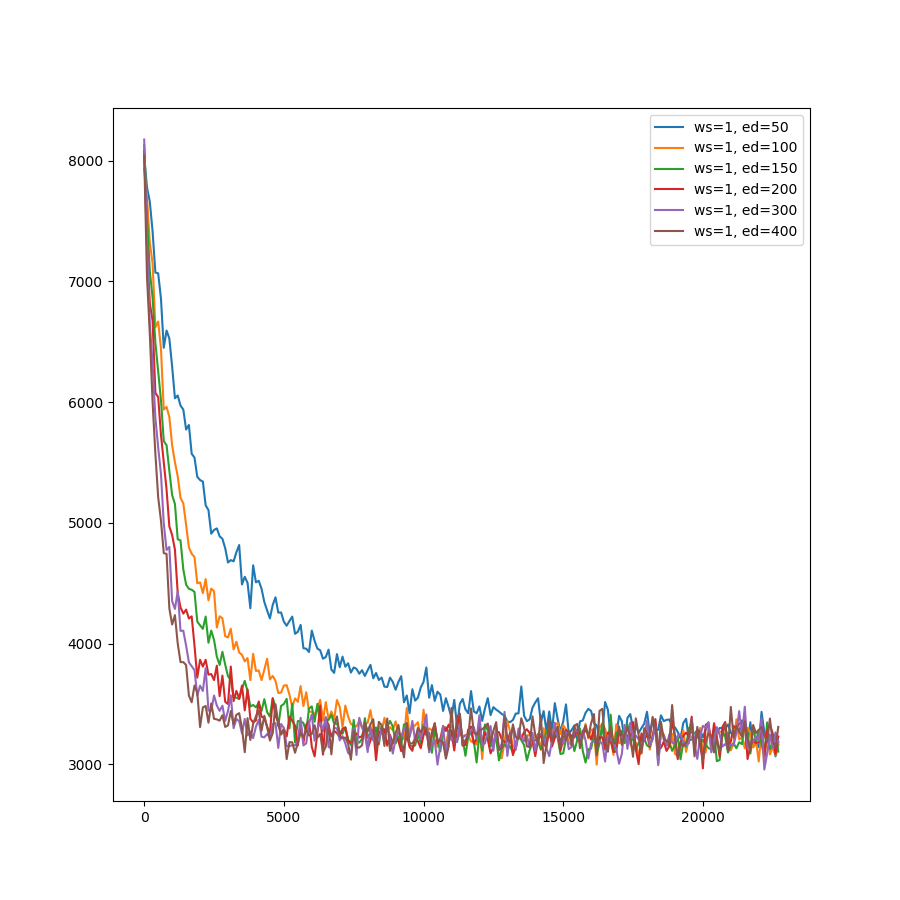

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9., 9.)

# fig, ax = plt.subplots()
# for trainer_list in sk_trainers:
#     for trainer in trainer_list:
#         ax.plot(trainer.loss_history['iter'],trainer.loss_history['loss'],
#                 label='ws={}, ed={}'.format(trainer.window_size, trainer.embedding_dim))
# ax.legend()

fig, ax = plt.subplots()
for trainer in sk_trainers[0]:
    ax.plot(trainer.loss_history['iter'],trainer.loss_history['loss'],
            label='ws={}, ed={}'.format(trainer.window_size, trainer.embedding_dim))
ax.legend()

In [44]:
#corpus = [['w1', 'w2', 'w3', 'w4'], ['w1', 'w3', 'w3', 'w3'], ['w1'], ['w1', 'w2', 'w3', 'w4', 'w1', 'w2', 'w3', 'w4']]
corpus = GetTrainCorpus('./promptsl40.train')
cutoff_freq = 0
window_size_list = [1, 2, 3, 4, 5, 6, 7, 8]
batch_size = 512

state_dict = None
device = 'cuda:1'
paralelize = False
embedding_dim_list = [50, 100, 150, 200, 300, 400]

cbow_trainers = []
for window_size in window_size_list:
    embedding_dim_trainers = []
    for embedding_dim in embedding_dim_list:
        cbow_trainer = CBOWTrainer(corpus, cutoff_freq, window_size, batch_size)
        cbow_trainer.InitModel(state_dict=state_dict, device=device, paralelize=paralelize, embedding_dim=embedding_dim)
        embedding_dim_trainers.append(cbow_trainer)
    cbow_trainers.append(embedding_dim_trainers)

CBOW trainer created:
Window size: 2
Number of samples: 10
Vocabulary Size: 2
Number of batches: 1
Number of samples per batch: 64

Dispositivo seleccionado: cpu
Dimensión del espacio de los embeddings: 10


In [45]:
algorithm = 'Adam'
epochs = 300
sample_loss_every = 100
learning_rate = 5e-4

for trainer_list in cbow_trainers:
    for trainer in trainer_list:
        trainer.Train(algorithm=algorithm, epochs=epochs, sample_loss_every=sample_loss_every, lr=learning_rate)

Starting training...
Optimization method: SGD
Learning Rate: 0.001
Number of epochs: 1
Running on device (cpu)

Epoch: 1, Batch number: 0, Loss: 7.79583740234375
Training finished



# IMPORTANTE:

1. Hicimos un modelo de lenguaje baseline con la instrucción `HBuild -s '<s>' '</s>' vocab wdnet_baseline`

2. Hicimos un modelo de lenguaje frecuentista con `ngram-count` y `HBuild` de la siguiente manera:
```
export LC_CTYPE=ISO_8859_1
awk '{for(i=2;i<=NF;i++){printf "%s ", $i} printf "\n"}' ../etc/promptsl40.train > trainLM.txt
/usr/local/speechapp/srilm/bin/i686-m64/ngram-count -order 2 -text trainLM.txt -lm lm_freq -ukndiscount2 -vocab vocab
HBuild -n lm_freq -s '<s>' '</s>' vocab wdnet
```

`vocab` fue generado como `cat ../etc/promptsl40.test | awk '{for(i=2;i<=NF;i++){print $i}}'| sort | uniq > vocab` y agregando manualmente `<s>` y `</s>`. 

3. Hicimos un modelo de lenguaje para cada uno de los entrenamientos de word-vectors. Los parámetros que se modificaron fueron cbow/sk, window size y embedding dim. 

## Entrenamiento con Wikipedia y las frases de train de L40

## IMPORTANTE:

Probar con ed= 50, 100, 200, 300, 400 y con windows size bajos (ws = 1, 2, 3, 4) y con skipgram.


In [2]:
corpus = GetTrainCorpus('./promptsl40.train')
with open('wiki', 'r') as wikifile:
    corpus = [corpus[0] + wikifile.read().split(' ')]

In [3]:
#corpus = GetTrainCorpus('./promptsl40.train')
cutoff_freq = 3
window_size_list = [1, 2, 3, 4]
batch_size = 512

state_dict = None
device = 'cuda:1'
paralelize = False
embedding_dim_list = [50, 100, 200, 300]

sk_trainers = []
for window_size in window_size_list:
    embedding_dim_trainers = []
    for embedding_dim in embedding_dim_list:
        sk_trainer = SkipGramTrainer(corpus, cutoff_freq, window_size, batch_size)
        sk_trainer.InitModel(state_dict=state_dict, device=device, paralelize=paralelize, embedding_dim=embedding_dim)
        embedding_dim_trainers.append(sk_trainer)
    sk_trainers.append(embedding_dim_trainers)

algorithm = 'Adam'
epochs = 2
sample_loss_every = 100
learning_rate = 5e-4

for trainer_list in sk_trainers:
    for trainer in trainer_list:
        trainer.Train(algorithm=algorithm, epochs=epochs, sample_loss_every=sample_loss_every, lr=learning_rate)
        
import pickle

with open('sk_trainers_wiki.bin', 'wb') as sk_trainers_file:
    pickle.dump(sk_trainers, sk_trainers_file)

SkipGram trainer created:
Window size: 1
Number of samples: 4396714
Vocabulary Size: 53277
Number of batches: 8588
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 50
SkipGram trainer created:
Window size: 1
Number of samples: 4396714
Vocabulary Size: 53277
Number of batches: 8588
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 100
SkipGram trainer created:
Window size: 1
Number of samples: 4396714
Vocabulary Size: 53277
Number of batches: 8588
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 200
SkipGram trainer created:
Window size: 1
Number of samples: 4396714
Vocabulary Size: 53277
Number of batches: 8588
Number of samples per batch: 512

Dispositivo seleccionado: cuda:1
Dimensión del espacio de los embeddings: 300
SkipGram trainer created:
Window size: 2
Number of samples: 4413495
Vocabulary Size: 53277
Nu

Epoch: 2, Batch number: 12, Loss: 6894.99755859375
Epoch: 2, Batch number: 112, Loss: 6933.58154296875
Epoch: 2, Batch number: 212, Loss: 6967.2724609375
Epoch: 2, Batch number: 312, Loss: 6877.908203125
Epoch: 2, Batch number: 412, Loss: 6861.57861328125
Epoch: 2, Batch number: 512, Loss: 6833.83447265625
Epoch: 2, Batch number: 612, Loss: 6922.453125
Epoch: 2, Batch number: 712, Loss: 6993.90185546875
Epoch: 2, Batch number: 812, Loss: 6879.76513671875
Epoch: 2, Batch number: 912, Loss: 6962.74267578125
Epoch: 2, Batch number: 1012, Loss: 6676.07763671875
Epoch: 2, Batch number: 1112, Loss: 6704.89111328125
Epoch: 2, Batch number: 1212, Loss: 7024.58349609375
Epoch: 2, Batch number: 1312, Loss: 6834.54638671875
Epoch: 2, Batch number: 1412, Loss: 6961.58642578125
Epoch: 2, Batch number: 1512, Loss: 6914.6494140625
Epoch: 2, Batch number: 1612, Loss: 6928.099609375
Epoch: 2, Batch number: 1712, Loss: 6752.64892578125
Epoch: 2, Batch number: 1812, Loss: 6708.3115234375
Epoch: 2, Batch 

Epoch: 1, Batch number: 7000, Loss: 6709.99267578125
Epoch: 1, Batch number: 7100, Loss: 6739.166015625
Epoch: 1, Batch number: 7200, Loss: 6758.20166015625
Epoch: 1, Batch number: 7300, Loss: 6630.3642578125
Epoch: 1, Batch number: 7400, Loss: 6720.04736328125
Epoch: 1, Batch number: 7500, Loss: 6716.56689453125
Epoch: 1, Batch number: 7600, Loss: 6625.98388671875
Epoch: 1, Batch number: 7700, Loss: 6782.81884765625
Epoch: 1, Batch number: 7800, Loss: 6818.36767578125
Epoch: 1, Batch number: 7900, Loss: 6767.86328125
Epoch: 1, Batch number: 8000, Loss: 6919.2294921875
Epoch: 1, Batch number: 8100, Loss: 6736.4453125
Epoch: 1, Batch number: 8200, Loss: 6880.1953125
Epoch: 1, Batch number: 8300, Loss: 6742.24267578125
Epoch: 1, Batch number: 8400, Loss: 6595.46826171875
Epoch: 1, Batch number: 8500, Loss: 6882.59228515625
Epoch: 2, Batch number: 12, Loss: 6620.2939453125
Epoch: 2, Batch number: 112, Loss: 6754.7314453125
Epoch: 2, Batch number: 212, Loss: 6566.4833984375
Epoch: 2, Batch

Epoch: 1, Batch number: 5400, Loss: 7009.60791015625
Epoch: 1, Batch number: 5500, Loss: 6857.02685546875
Epoch: 1, Batch number: 5600, Loss: 6962.76416015625
Epoch: 1, Batch number: 5700, Loss: 6674.662109375
Epoch: 1, Batch number: 5800, Loss: 6754.6591796875
Epoch: 1, Batch number: 5900, Loss: 6964.591796875
Epoch: 1, Batch number: 6000, Loss: 6672.150390625
Epoch: 1, Batch number: 6100, Loss: 6792.64208984375
Epoch: 1, Batch number: 6200, Loss: 6536.70751953125
Epoch: 1, Batch number: 6300, Loss: 6872.287109375
Epoch: 1, Batch number: 6400, Loss: 6805.74609375
Epoch: 1, Batch number: 6500, Loss: 6835.42578125
Epoch: 1, Batch number: 6600, Loss: 6653.2685546875
Epoch: 1, Batch number: 6700, Loss: 6670.2998046875
Epoch: 1, Batch number: 6800, Loss: 6840.4912109375
Epoch: 1, Batch number: 6900, Loss: 6756.49072265625
Epoch: 1, Batch number: 7000, Loss: 6651.25390625
Epoch: 1, Batch number: 7100, Loss: 6663.23486328125
Epoch: 1, Batch number: 7200, Loss: 6719.3671875
Epoch: 1, Batch nu

Epoch: 1, Batch number: 3800, Loss: 6862.3134765625
Epoch: 1, Batch number: 3900, Loss: 6835.86865234375
Epoch: 1, Batch number: 4000, Loss: 6826.65771484375
Epoch: 1, Batch number: 4100, Loss: 7072.49365234375
Epoch: 1, Batch number: 4200, Loss: 6698.8984375
Epoch: 1, Batch number: 4300, Loss: 7011.92236328125
Epoch: 1, Batch number: 4400, Loss: 6994.2763671875
Epoch: 1, Batch number: 4500, Loss: 6848.99462890625
Epoch: 1, Batch number: 4600, Loss: 6928.287109375
Epoch: 1, Batch number: 4700, Loss: 6746.8447265625
Epoch: 1, Batch number: 4800, Loss: 6586.46435546875
Epoch: 1, Batch number: 4900, Loss: 6749.14794921875
Epoch: 1, Batch number: 5000, Loss: 6585.482421875
Epoch: 1, Batch number: 5100, Loss: 6813.0126953125
Epoch: 1, Batch number: 5200, Loss: 6618.20849609375
Epoch: 1, Batch number: 5300, Loss: 6473.57763671875
Epoch: 1, Batch number: 5400, Loss: 6704.216796875
Epoch: 1, Batch number: 5500, Loss: 6718.78466796875
Epoch: 1, Batch number: 5600, Loss: 6805.05126953125
Epoch: 

Epoch: 1, Batch number: 2200, Loss: 15814.1142578125
Epoch: 1, Batch number: 2300, Loss: 16343.1669921875
Epoch: 1, Batch number: 2400, Loss: 15909.6455078125
Epoch: 1, Batch number: 2500, Loss: 16025.359375
Epoch: 1, Batch number: 2600, Loss: 15699.6796875
Epoch: 1, Batch number: 2700, Loss: 15811.0576171875
Epoch: 1, Batch number: 2800, Loss: 15725.0029296875
Epoch: 1, Batch number: 2900, Loss: 15516.88671875
Epoch: 1, Batch number: 3000, Loss: 15466.9990234375
Epoch: 1, Batch number: 3100, Loss: 15762.7392578125
Epoch: 1, Batch number: 3200, Loss: 15712.3251953125
Epoch: 1, Batch number: 3300, Loss: 15425.3671875
Epoch: 1, Batch number: 3400, Loss: 15429.1552734375
Epoch: 1, Batch number: 3500, Loss: 15467.88671875
Epoch: 1, Batch number: 3600, Loss: 15319.8271484375
Epoch: 1, Batch number: 3700, Loss: 15178.8525390625
Epoch: 1, Batch number: 3800, Loss: 15143.197265625
Epoch: 1, Batch number: 3900, Loss: 15402.14453125
Epoch: 1, Batch number: 4000, Loss: 15550.73046875
Epoch: 1, Ba

Epoch: 1, Batch number: 500, Loss: 18511.6171875
Epoch: 1, Batch number: 600, Loss: 17934.765625
Epoch: 1, Batch number: 700, Loss: 17919.994140625
Epoch: 1, Batch number: 800, Loss: 17905.85546875
Epoch: 1, Batch number: 900, Loss: 17667.791015625
Epoch: 1, Batch number: 1000, Loss: 17256.95703125
Epoch: 1, Batch number: 1100, Loss: 17014.474609375
Epoch: 1, Batch number: 1200, Loss: 16679.95703125
Epoch: 1, Batch number: 1300, Loss: 16427.76953125
Epoch: 1, Batch number: 1400, Loss: 16695.560546875
Epoch: 1, Batch number: 1500, Loss: 16358.8125
Epoch: 1, Batch number: 1600, Loss: 16393.2890625
Epoch: 1, Batch number: 1700, Loss: 16145.0947265625
Epoch: 1, Batch number: 1800, Loss: 16136.6015625
Epoch: 1, Batch number: 1900, Loss: 15779.609375
Epoch: 1, Batch number: 2000, Loss: 15247.4267578125
Epoch: 1, Batch number: 2100, Loss: 15475.9228515625
Epoch: 1, Batch number: 2200, Loss: 15452.6142578125
Epoch: 1, Batch number: 2300, Loss: 15625.1875
Epoch: 1, Batch number: 2400, Loss: 151

Epoch: 2, Batch number: 7779, Loss: 13667.1953125
Epoch: 2, Batch number: 7879, Loss: 13618.791015625
Epoch: 2, Batch number: 7979, Loss: 13902.7939453125
Epoch: 2, Batch number: 8079, Loss: 13940.013671875
Epoch: 2, Batch number: 8179, Loss: 14007.8193359375
Epoch: 2, Batch number: 8279, Loss: 13656.83984375
Epoch: 2, Batch number: 8379, Loss: 13597.2802734375
Epoch: 2, Batch number: 8479, Loss: 13603.888671875
Epoch: 2, Batch number: 8579, Loss: 13972.49609375
Training finished

Starting training...
Optimization method: Adam
Learning Rate: 0.0005
Number of epochs: 2
Running on device (cuda:1)

Epoch: 1, Batch number: 0, Loss: 21671.755859375
Epoch: 1, Batch number: 100, Loss: 20411.244140625
Epoch: 1, Batch number: 200, Loss: 19565.419921875
Epoch: 1, Batch number: 300, Loss: 18772.638671875
Epoch: 1, Batch number: 400, Loss: 18252.6875
Epoch: 1, Batch number: 500, Loss: 18042.708984375
Epoch: 1, Batch number: 600, Loss: 17764.44921875
Epoch: 1, Batch number: 700, Loss: 17167.5
Epoch

Epoch: 2, Batch number: 6079, Loss: 13595.34765625
Epoch: 2, Batch number: 6179, Loss: 13287.353515625
Epoch: 2, Batch number: 6279, Loss: 13279.3857421875
Epoch: 2, Batch number: 6379, Loss: 13513.6962890625
Epoch: 2, Batch number: 6479, Loss: 13738.28515625
Epoch: 2, Batch number: 6579, Loss: 13385.2626953125
Epoch: 2, Batch number: 6679, Loss: 13679.9306640625
Epoch: 2, Batch number: 6779, Loss: 13374.0126953125
Epoch: 2, Batch number: 6879, Loss: 13553.818359375
Epoch: 2, Batch number: 6979, Loss: 13603.7685546875
Epoch: 2, Batch number: 7079, Loss: 13588.18359375
Epoch: 2, Batch number: 7179, Loss: 13481.634765625
Epoch: 2, Batch number: 7279, Loss: 13436.2275390625
Epoch: 2, Batch number: 7379, Loss: 13456.0517578125
Epoch: 2, Batch number: 7479, Loss: 13596.337890625
Epoch: 2, Batch number: 7579, Loss: 13770.30859375
Epoch: 2, Batch number: 7679, Loss: 13685.2861328125
Epoch: 2, Batch number: 7779, Loss: 13456.6015625
Epoch: 2, Batch number: 7879, Loss: 13654.154296875
Epoch: 2,

Epoch: 2, Batch number: 4379, Loss: 13304.1494140625
Epoch: 2, Batch number: 4479, Loss: 13502.6044921875
Epoch: 2, Batch number: 4579, Loss: 13511.5634765625
Epoch: 2, Batch number: 4679, Loss: 13255.71875
Epoch: 2, Batch number: 4779, Loss: 13646.4658203125
Epoch: 2, Batch number: 4879, Loss: 13488.115234375
Epoch: 2, Batch number: 4979, Loss: 13443.6044921875
Epoch: 2, Batch number: 5079, Loss: 13567.482421875
Epoch: 2, Batch number: 5179, Loss: 13399.0224609375
Epoch: 2, Batch number: 5279, Loss: 13611.7392578125
Epoch: 2, Batch number: 5379, Loss: 13612.0126953125
Epoch: 2, Batch number: 5479, Loss: 13381.1796875
Epoch: 2, Batch number: 5579, Loss: 13517.0419921875
Epoch: 2, Batch number: 5679, Loss: 13543.1337890625
Epoch: 2, Batch number: 5779, Loss: 13415.43359375
Epoch: 2, Batch number: 5879, Loss: 13371.556640625
Epoch: 2, Batch number: 5979, Loss: 13169.0048828125
Epoch: 2, Batch number: 6079, Loss: 13261.6123046875
Epoch: 2, Batch number: 6179, Loss: 13592.0458984375
Epoch:

Epoch: 2, Batch number: 2878, Loss: 21569.109375
Epoch: 2, Batch number: 2978, Loss: 21625.646484375
Epoch: 2, Batch number: 3078, Loss: 21612.8203125
Epoch: 2, Batch number: 3178, Loss: 21467.828125
Epoch: 2, Batch number: 3278, Loss: 21458.10546875
Epoch: 2, Batch number: 3378, Loss: 21503.267578125
Epoch: 2, Batch number: 3478, Loss: 21632.060546875
Epoch: 2, Batch number: 3578, Loss: 21585.666015625
Epoch: 2, Batch number: 3678, Loss: 21123.283203125
Epoch: 2, Batch number: 3778, Loss: 21644.021484375
Epoch: 2, Batch number: 3878, Loss: 21600.041015625
Epoch: 2, Batch number: 3978, Loss: 21541.53515625
Epoch: 2, Batch number: 4078, Loss: 21521.3125
Epoch: 2, Batch number: 4178, Loss: 21381.19140625
Epoch: 2, Batch number: 4278, Loss: 21415.875
Epoch: 2, Batch number: 4378, Loss: 21548.548828125
Epoch: 2, Batch number: 4478, Loss: 21733.26171875
Epoch: 2, Batch number: 4578, Loss: 21260.251953125
Epoch: 2, Batch number: 4678, Loss: 21232.55078125
Epoch: 2, Batch number: 4778, Loss: 

Epoch: 2, Batch number: 1478, Loss: 21185.140625
Epoch: 2, Batch number: 1578, Loss: 21142.23828125
Epoch: 2, Batch number: 1678, Loss: 21290.791015625
Epoch: 2, Batch number: 1778, Loss: 21250.87109375
Epoch: 2, Batch number: 1878, Loss: 21204.27734375
Epoch: 2, Batch number: 1978, Loss: 21610.859375
Epoch: 2, Batch number: 2078, Loss: 21449.7421875
Epoch: 2, Batch number: 2178, Loss: 21383.201171875
Epoch: 2, Batch number: 2278, Loss: 21188.53515625
Epoch: 2, Batch number: 2378, Loss: 21224.708984375
Epoch: 2, Batch number: 2478, Loss: 20999.318359375
Epoch: 2, Batch number: 2578, Loss: 21349.3984375
Epoch: 2, Batch number: 2678, Loss: 21398.009765625
Epoch: 2, Batch number: 2778, Loss: 21291.71484375
Epoch: 2, Batch number: 2878, Loss: 21132.634765625
Epoch: 2, Batch number: 2978, Loss: 21231.83203125
Epoch: 2, Batch number: 3078, Loss: 21261.564453125
Epoch: 2, Batch number: 3178, Loss: 21193.24609375
Epoch: 2, Batch number: 3278, Loss: 21723.69140625
Epoch: 2, Batch number: 3378, 

Epoch: 2, Batch number: 78, Loss: 21042.44921875
Epoch: 2, Batch number: 178, Loss: 20706.947265625
Epoch: 2, Batch number: 278, Loss: 20953.802734375
Epoch: 2, Batch number: 378, Loss: 21048.880859375
Epoch: 2, Batch number: 478, Loss: 21119.17578125
Epoch: 2, Batch number: 578, Loss: 20886.734375
Epoch: 2, Batch number: 678, Loss: 20651.2734375
Epoch: 2, Batch number: 778, Loss: 20850.041015625
Epoch: 2, Batch number: 878, Loss: 20714.3359375
Epoch: 2, Batch number: 978, Loss: 20865.447265625
Epoch: 2, Batch number: 1078, Loss: 21307.669921875
Epoch: 2, Batch number: 1178, Loss: 20965.68359375
Epoch: 2, Batch number: 1278, Loss: 21117.416015625
Epoch: 2, Batch number: 1378, Loss: 20978.59765625
Epoch: 2, Batch number: 1478, Loss: 20808.015625
Epoch: 2, Batch number: 1578, Loss: 20856.197265625
Epoch: 2, Batch number: 1678, Loss: 20996.849609375
Epoch: 2, Batch number: 1778, Loss: 20976.423828125
Epoch: 2, Batch number: 1878, Loss: 21076.734375
Epoch: 2, Batch number: 1978, Loss: 2061

Epoch: 1, Batch number: 7300, Loss: 21614.978515625
Epoch: 1, Batch number: 7400, Loss: 21097.884765625
Epoch: 1, Batch number: 7500, Loss: 20993.4140625
Epoch: 1, Batch number: 7600, Loss: 21299.98828125
Epoch: 1, Batch number: 7700, Loss: 21000.974609375
Epoch: 1, Batch number: 7800, Loss: 21062.2734375
Epoch: 1, Batch number: 7900, Loss: 21172.328125
Epoch: 1, Batch number: 8000, Loss: 21509.07421875
Epoch: 1, Batch number: 8100, Loss: 21085.0234375
Epoch: 1, Batch number: 8200, Loss: 21087.724609375
Epoch: 1, Batch number: 8300, Loss: 21069.8828125
Epoch: 1, Batch number: 8400, Loss: 21180.287109375
Epoch: 1, Batch number: 8500, Loss: 21412.724609375
Epoch: 1, Batch number: 8600, Loss: 21111.302734375
Epoch: 2, Batch number: 78, Loss: 20315.888671875
Epoch: 2, Batch number: 178, Loss: 20268.345703125
Epoch: 2, Batch number: 278, Loss: 20792.564453125
Epoch: 2, Batch number: 378, Loss: 20784.763671875
Epoch: 2, Batch number: 478, Loss: 20692.533203125
Epoch: 2, Batch number: 578, Lo

Epoch: 1, Batch number: 5900, Loss: 29739.38671875
Epoch: 1, Batch number: 6000, Loss: 29893.751953125
Epoch: 1, Batch number: 6100, Loss: 29727.30078125
Epoch: 1, Batch number: 6200, Loss: 29515.373046875
Epoch: 1, Batch number: 6300, Loss: 29404.3515625
Epoch: 1, Batch number: 6400, Loss: 29357.0703125
Epoch: 1, Batch number: 6500, Loss: 29486.515625
Epoch: 1, Batch number: 6600, Loss: 29372.826171875
Epoch: 1, Batch number: 6700, Loss: 29964.701171875
Epoch: 1, Batch number: 6800, Loss: 29290.6484375
Epoch: 1, Batch number: 6900, Loss: 29384.890625
Epoch: 1, Batch number: 7000, Loss: 29263.630859375
Epoch: 1, Batch number: 7100, Loss: 29713.205078125
Epoch: 1, Batch number: 7200, Loss: 30250.169921875
Epoch: 1, Batch number: 7300, Loss: 29976.76171875
Epoch: 1, Batch number: 7400, Loss: 29337.501953125
Epoch: 1, Batch number: 7500, Loss: 29219.29296875
Epoch: 1, Batch number: 7600, Loss: 29604.18359375
Epoch: 1, Batch number: 7700, Loss: 28991.919921875
Epoch: 1, Batch number: 7800,

Epoch: 1, Batch number: 4500, Loss: 29954.99609375
Epoch: 1, Batch number: 4600, Loss: 29331.916015625
Epoch: 1, Batch number: 4700, Loss: 29630.103515625
Epoch: 1, Batch number: 4800, Loss: 29157.26953125
Epoch: 1, Batch number: 4900, Loss: 29264.822265625
Epoch: 1, Batch number: 5000, Loss: 29763.0546875
Epoch: 1, Batch number: 5100, Loss: 29444.107421875
Epoch: 1, Batch number: 5200, Loss: 29566.412109375
Epoch: 1, Batch number: 5300, Loss: 29759.017578125
Epoch: 1, Batch number: 5400, Loss: 29248.330078125
Epoch: 1, Batch number: 5500, Loss: 29958.302734375
Epoch: 1, Batch number: 5600, Loss: 29324.947265625
Epoch: 1, Batch number: 5700, Loss: 28827.8515625
Epoch: 1, Batch number: 5800, Loss: 29507.677734375
Epoch: 1, Batch number: 5900, Loss: 29721.8984375
Epoch: 1, Batch number: 6000, Loss: 29318.98046875
Epoch: 1, Batch number: 6100, Loss: 29564.931640625
Epoch: 1, Batch number: 6200, Loss: 29242.462890625
Epoch: 1, Batch number: 6300, Loss: 28699.8671875
Epoch: 1, Batch number:

Epoch: 1, Batch number: 3000, Loss: 29664.787109375
Epoch: 1, Batch number: 3100, Loss: 29937.509765625
Epoch: 1, Batch number: 3200, Loss: 29595.427734375
Epoch: 1, Batch number: 3300, Loss: 29955.212890625
Epoch: 1, Batch number: 3400, Loss: 29782.29296875
Epoch: 1, Batch number: 3500, Loss: 29424.490234375
Epoch: 1, Batch number: 3600, Loss: 29689.201171875
Epoch: 1, Batch number: 3700, Loss: 29659.94140625
Epoch: 1, Batch number: 3800, Loss: 29441.330078125
Epoch: 1, Batch number: 3900, Loss: 29513.2734375
Epoch: 1, Batch number: 4000, Loss: 29311.04296875
Epoch: 1, Batch number: 4100, Loss: 29281.064453125
Epoch: 1, Batch number: 4200, Loss: 29468.388671875
Epoch: 1, Batch number: 4300, Loss: 29291.794921875
Epoch: 1, Batch number: 4400, Loss: 29102.513671875
Epoch: 1, Batch number: 4500, Loss: 29836.478515625
Epoch: 1, Batch number: 4600, Loss: 29665.689453125
Epoch: 1, Batch number: 4700, Loss: 29332.916015625
Epoch: 1, Batch number: 4800, Loss: 28837.373046875
Epoch: 1, Batch n

Epoch: 1, Batch number: 1600, Loss: 30809.0078125
Epoch: 1, Batch number: 1700, Loss: 30955.927734375
Epoch: 1, Batch number: 1800, Loss: 30161.462890625
Epoch: 1, Batch number: 1900, Loss: 30577.83203125
Epoch: 1, Batch number: 2000, Loss: 30098.396484375
Epoch: 1, Batch number: 2100, Loss: 29653.865234375
Epoch: 1, Batch number: 2200, Loss: 30368.587890625
Epoch: 1, Batch number: 2300, Loss: 29987.689453125
Epoch: 1, Batch number: 2400, Loss: 30013.81640625
Epoch: 1, Batch number: 2500, Loss: 29875.9375
Epoch: 1, Batch number: 2600, Loss: 29957.00390625
Epoch: 1, Batch number: 2700, Loss: 29996.56640625
Epoch: 1, Batch number: 2800, Loss: 28988.576171875
Epoch: 1, Batch number: 2900, Loss: 29910.26953125
Epoch: 1, Batch number: 3000, Loss: 29357.66796875
Epoch: 1, Batch number: 3100, Loss: 29427.005859375
Epoch: 1, Batch number: 3200, Loss: 30156.076171875
Epoch: 1, Batch number: 3300, Loss: 28943.84375
Epoch: 1, Batch number: 3400, Loss: 29067.021484375
Epoch: 1, Batch number: 3500,

<IPython.core.display.Javascript object>


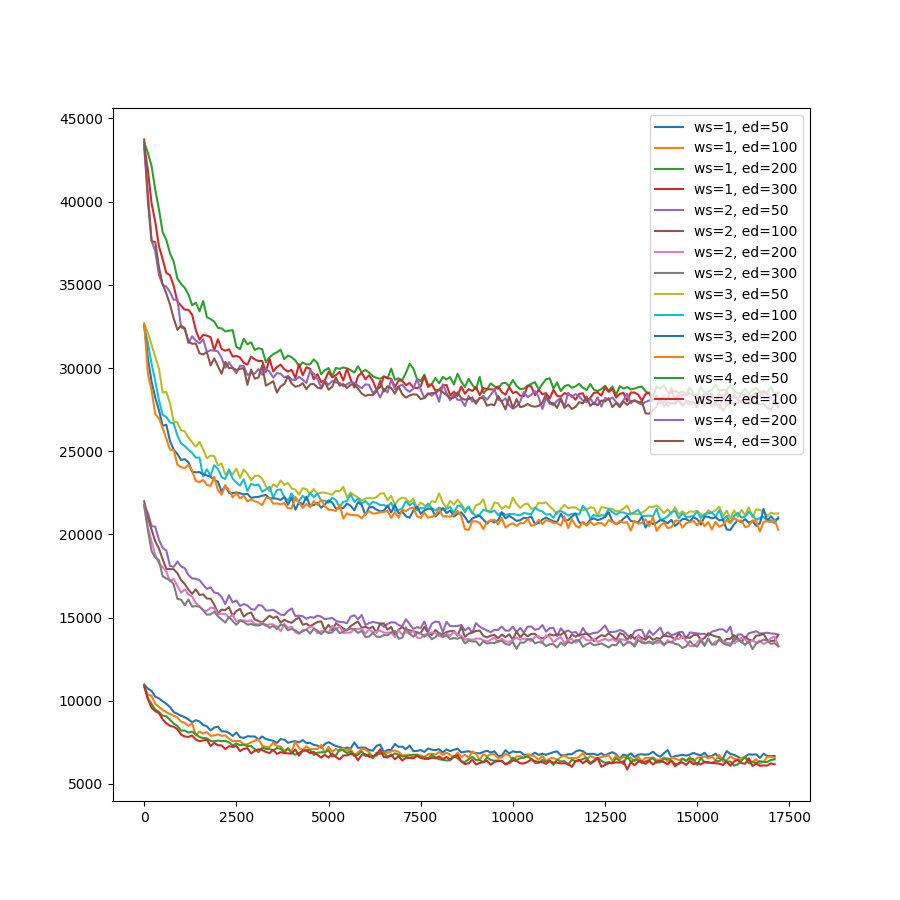

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9., 9.)

fig, ax = plt.subplots()
for trainer_list in sk_trainers:
    for trainer in trainer_list:
        ax.plot(trainer.loss_history['iter'],trainer.loss_history['loss'],
                label='ws={}, ed={}'.format(trainer.window_size, trainer.embedding_dim))
ax.legend()

In [5]:
test_filename = './promptsl40.test'
for embedding_dim_list in sk_trainers:
    for trainer in embedding_dim_list:
        output_file = '/home/lestien/final/lm/lm_word_vectors/sk_wiki_ws_{}_ed_{}'.format(trainer.window_size,trainer.embedding_dim)
        GetARPAFile(trainer, test_filename, output_file)

In [38]:
# Ver!!
with open('./promptsl40.train', 'rb') as file:
    train_corpus = file.readlines()
    train_lines = [re.split(r'[\t \n]',l.decode('iso-8859-1'))[2:-1] for l in train_corpus]

with open('./wiki', 'rb') as file:
    wiki_corpus = file.read().decode('utf-8').split(' ')
    wiki_lines = []
    new_corpus = []
    for tk in wiki_corpus:
        try:
            _ = tk.encode('iso-8859-1')
            new_corpus.append(tk)
        except UnicodeEncodeError:
            pass
    new_wiki_corpus = []
    for i in range(len(new_corpus) // 10):
        new_wiki_corpus.append([])
        for j in range(10):
            new_wiki_corpus[i].append(new_corpus[i * 10 + j])
    new_wiki_corpus.append([tk for tk in new_corpus[(i*10):]])
    text = ''
    for line in new_wiki_corpus:
        text += ' '.join(line) + '\n'
    
with open('wiki-frase', 'wb') as file:
    file.write(text.encode('iso-8859-1'))
    


In [37]:
for tk in wiki_corpus:
    new_corpus = []
    try:
        _ = tk.encode('iso-8859-1')
        new_corpus.append(tk)

['naranj']

In [34]:
wiki_corpus[13].encode('iso-8859-1')

b'de'

In [30]:
'de'.encode('iso-8859-1')

b'de'

In [35]:
for i,tk in enumerate(wiki_corpus):
    try:
        tk.encode('iso-8859-1')
        print(tk, i)
    except UnicodeEncodeError:
        pass

por 0
temáticalistas 1
relacionadas 2
wikipedia 3
dispone 4
de 5
varios 6
proyectos 7
internos 8
para 9
mejorar 10
los 11
artículos 12
de 13
ciertas 14
temáticas 15
estos 16
proyectos 17
a 18
su 19
vez 20
solicitan 21
artículos 22
de 23
las 24
temáticas 25
que 26
tratan 27
aquí 28
tienes 29
un 30
enlace 31
a 32
la 33
andorra 34
oficialmente 35
principado 36
de 37
andorra 38
es 39
un 40
pequeño 41
país 42
soberano 43
del 44
suroeste 45
de 46
europa 47
constituido 48
en 49
estado 50
independiente 51
de 52
derecho 53
democrático 54
y 55
social 56
cuya 57
forma 58
de 59
gobierno 60
es 61
el 62
coprincipado 63
parlamentario 64
su 65
territorio 66
está 67
organizado 68
en 69
siete 70
parroquias 71
con 72
una 73
población 74
total 75
de 76
habitantes 77
en 78
era 79
de 80
habitantes 81
de 82
los 83
cuales 84
eran 85
andorranos 86
españoles 87
portugueses 88
franceses 89
y 90
de 91
otras 92
nacionalidades 93
debido 94
a 95
una 96
política 97
voluntaria 98
de 99
carácter 100
restrictivo 101
par

el 2217
a 2218
josé 2219
luis 2220
sampedro 2221
arquitectura 2222
andorra 2223
cuenta 2224
con 2225
un 2226
gran 2227
número 2228
de 2229
monumentos 2230
románicos 2231
la 2232
iglesia 2233
de 2234
santa 2235
coloma 2236
construida 2237
entre 2238
los 2239
siglos 2240
ix 2241
y 2242
x 2243
d 2244
c 2245
es 2246
una 2247
de 2248
las 2249
pocas 2250
iglesias 2251
románicas 2252
del 2253
mundo 2254
con 2255
campanario 2256
cilíndrico 2257
fechado 2258
en 2259
el 2260
siglo 2261
xii 2262
literatura 2263
la 2264
literatura 2265
andorrana 2266
tiene 2267
sus 2268
orígenes 2269
en 2270
el 2271
siglo 2272
xviii 2273
antoni 2274
fiter 2275
i 2276
rossell 2277
escribió 2278
un 2279
libro 2280
sobre 2281
la 2282
historia 2283
el 2284
gobierno 2285
y 2286
los 2287
usos 2288
y 2289
costumbres 2290
de 2291
andorra 2292
llamado 2293
manual 2294
digest 2295
de 2296
las 2297
valls 2298
neustras 2299
de 2300
andorra 2301
en 2302
esta 2303
obra 2304
también 2305
contiene 2306
los 2307
documentos 2308
de

un 3730
país 3731
soberano 3732
de 3733
américa 3734
del 3735
sur 3736
ubicado 3737
en 3738
el 3739
extremo 3740
sur 3741
y 3742
sudeste 3743
de 3744
dicho 3745
subcontinente 3746
adopta 3747
la 3748
forma 3749
de 3750
gobierno 3751
republicana 3752
democrática 3753
representativa 3754
y 3755
federal 3756
la 3757
argentina 3758
está 3759
organizada 3760
como 3761
un 3762
estado 3763
federal 3764
descentralizado 3765
integrado 3766
desde 3767
por 3768
un 3769
estado 3770
nacional 3771
y 3772
estados 3773
autogobernados 3774
siendo 3775
estos 3776
sus 3777
provincias 3778
sumada 3779
la 3780
ciudad 3781
autónoma 3782
de 3783
buenos 3784
aires 3785
designada 3786
como 3787
capital 3788
federal 3789
del 3790
país 3791
cada 3792
estado 3793
tiene 3794
autonomía 3795
política 3796
constitución 3797
bandera 3798
y 3799
cuerpo 3800
de 3801
seguridad 3802
propios 3803
las 3804
provincias 3805
mantienen 3806
todos 3807
los 3808
poderes 3809
no 3810
delegados 3811
al 3812
estado 3813
nacional 381

argentina» 4538
por 4539
elipsis 4540
del 4541
sustantivo 4542
suele 4543
decirse 4544
correctamente 4545
«la 4546
argentina» 4547
sin 4548
embargo 4549
está 4550
muy 4551
extendido 4552
el 4553
uso 4554
sin 4555
el 4556
artículo 4557
el 4558
nombre 4559
«argentina» 4560
proviene 4561
del 4562
latín 4563
argentum 4564
y 4566
está 4567
asociado 4568
a 4569
la 4570
leyenda 4571
de 4572
la 4573
sierra 4574
de 4575
la 4576
plata 4577
común 4578
entre 4579
los 4580
primeros 4581
exploradores 4582
europeos 4583
de 4584
la 4585
región 4586
tanto 4587
españoles 4588
como 4589
portugueses 4590
fueron 4591
estos 4592
quienes 4593
denominaron 4594
rio 4595
da 4596
prata 4597
de 4599
la 4600
al 4602
gran 4603
estuario 4604
descubierto 4605
por 4606
la 4607
expedición 4608
portuguesa 4609
de 4610
en 4611
la 4612
que 4613
participaba 4614
américo 4615
vespucio 4616
y 4617
al 4618
que 4619
luego 4620
llegó 4621
juan 4622
díaz 4623
de 4624
solís 4625
en 4626
llamándolo 4627
mar 4628
dulce 4629
el 4630

autóctonos 6069
como 6070
los 6071
qoms 6072
moqoits 6073
mocovís 6074
o 6075
mocovíes 6076
pilagás 6077
y 6078
wichis 6079
hasta 6080
principios 6081
del 6082
siglo 6083
xx 6084
la 6085
población 6086
indígena 6087
sedentaria 6088
fue 6089
sometida 6090
a 6091
relaciones 6092
de 6093
dependencia 6094
permanente 6095
respecto 6096
de 6097
la 6098
población 6099
española 6100
aunque 6101
con 6102
el 6103
paso 6104
de 6105
las 6106
generaciones 6107
fue 6108
absorbida 6109
dentro 6110
una 6111
población 6112
étnicamente 6113
identificable 6114
como 6115
criolla 6116
este 6117
proceso 6118
de 6119
mestización 6120
no 6121
fue 6122
total 6123
como 6124
lo 6125
demuestra 6126
la 6127
participación 6128
de 6129
poblaciones 6130
del 6131
noroeste 6132
del 6133
actual 6134
territorio 6135
argentino 6136
en 6137
el 6138
gran 6139
levantamiento 6140
indígena 6141
de 6142
con 6143
epicentro 6144
en 6145
el 6146
cuzco 6147
dirigido 6148
por 6149
el 6150
inca 6151
túpac 6152
amarunbspii 6153
la 615

puerto 7657
de 7658
envalira 7659
m 7660
desciende 7661
hasta 7662
los 7663
m 7664
cuando 7665
el 7666
río 7667
valira 7668
entra 7669
en 7670
españa 7671
los 7672
recursos 7673
naturales 7674
de 7675
andorra 7676
se 7677
concentran 7678
en 7679
la 7680
energía 7681
hidroeléctrica 7682
agua 7683
mineral 7684
madera 7685
mineral 7686
ferroso 7687
y 7688
plomo 7689
la 7690
tierra 7691
arable 7692
representa 7693
el 7694
del 7695
uso 7696
de 7697
la 7698
tierra 7699
a 7700
cosechas 7701
permanentes 7702
se 7703
dedica 7704
y 7705
otros 7706
la 7707
central 7708
hidroeléctrica 7709
de 7710
les 7711
escaldes 7712
proporciona 7713
energía 7714
para 7715
andorra 7716
y 7717
el 7718
excedente 7719
se 7720
exporta 7721
a 7722
francia 7723
y 7724
españa 7725
la 7726
agricultura 7727
emplea 7728
al 7729
de 7730
la 7731
población 7732
activa 7733
la 7734
industria 7735
el 7736
y 7737
los 7738
servicios 7739
el 7740
no 7741
hay 7742
datos 7743
de 7744
la 7745
composición 7746
del 7747
pib 7748
por 

escultura 9183
así 9184
como 9185
las 9186
expresiones 9187
que 9188
incorporan 9189
nueva 9190
tecnología 9191
orientada 9192
al 9193
arte 9194
o 9195
elementos 9196
no 9197
convencionales 9198
y 9199
su 9200
mayor 9201
componente 9202
expresivo 9203
es 9204
visual 9205
también 9206
llamado 9207
arte 9208
de 9209
los 9210
nuevos 9211
medios 9212
entre 9213
los 9214
que 9215
se 9216
incluyen 9217
arte 9218
digital 9219
fanart 9220
fotografía 9221
net 9222
art 9223
videoarte 9224
arte 9225
abstracto 9226
así 9227
como 9228
otras 9229
expresiones 9230
de 9231
aparición 9232
en 9233
el 9234
arte 9235
del 9236
siglo 9237
xx 9238
como 9239
arte 9240
ambiental 9241
arte 9242
cinético 9243
arte 9244
efímero 9245
arte 9246
postal 9247
arte 9248
público 9249
arte 9250
urbano 9251
instalación 9252
intervención 9253
land 9254
art 9255
otras 9256
disciplinas 9257
artísticas 9258
como 9259
las 9260
artes 9261
escénicas 9262
poseen 9263
dimensiones 9264
compartidas 9265
con 9266
las 9267
artes 9268


esfuerzo 10721
bélico 10722
que 10723
exigía 10724
un 10725
prolongado 10726
servicio 10727
militar 10728
de 10729
los 10730
ciudadanos 10731
arruinó 10732
las 10733
pequeñas 10734
explotaciones 10735
en 10736
beneficio 10737
del 10738
modo 10739
de 10740
producción 10741
esclavista 10742
en 10743
ese 10744
sistema 10745
se 10746
incluía 10747
la 10748
mayor 10749
parte 10750
de 10751
la 10752
producción 10753
agrícola 10754
tanto 10755
la 10756
de 10757
los 10758
modestos 10759
lotes 10760
de 10761
tierras 10762
repartidos 10763
a 10764
soldados 10765
veteranos 10766
como 10767
los 10768
grandes 10769
latifundios 10770
en 10771
manos 10772
de 10773
la 10774
aristocracia 10775
senatorial 10776
en 10777
la 10778
lenta 10779
transición 10780
del 10781
esclavismo 10782
al 10783
feudalismo 10784
a 10785
partir 10786
de 10787
la 10788
crisis 10789
del 10790
siglo 10791
iii 10792
se 10793
sustituyeron 10794
los 10795
esclavos 10796
por 10797
siervos 10798
y 10799
el 10800
imperio 10801
se 10

así 12641
como 12642
de 12643
la 12644
informática 12645
son 12646
de 12647
gran 12648
ayuda 12649
al 12650
facilitar 12651
informes 12652
meteorológicos 12653
estudios 12654
de 12655
mercado 12656
etc 12657
además 12658
de 12659
comida 12660
para 12661
humanos 12662
y 12663
sus 12664
animales 12665
se 12666
produce 12667
cada 12668
vez 12669
con 12670
más 12671
amplia 12672
utilidad 12673
tales 12674
como 12675
flores 12676
plantas 12677
ornamentales 12678
madera 12679
fertilizantes 12680
pieles 12681
cuero 12682
productos 12683
químicos 12684
etanol 12685
plásticos 12686
azúcar 12687
almidón 12688
fibras 12689
algodón 12690
cáñamo 12691
lino 12692
combustible 12693
biodiésel 12694
el 12695
propio 12696
etanol 12697
que 12698
ahora 12699
ya 12700
se 12701
está 12702
obteniendo 12703
del 12704
maíz 12705
productos 12706
biofarmacéuticos 12707
y 12708
drogas 12709
tanto 12710
legales 12711
como 12712
ilegales 12713
tabaco 12714
marihuana 12715
opio 12716
cocaína 12717
también 12718
exis

y 14654
mango 14655
largo 14656
de 14657
madera 14658
terminado 14659
en 14660
un 14661
asa 14662
de 14663
metal 14664
picos 14665
son 14666
instrumentos 14667
compuestos 14668
de 14669
una 14670
parte 14671
de 14672
acero 14673
cuyos 14674
extremos 14675
terminan 14676
en 14677
forma 14678
de 14679
pala 14680
rectangular 14681
por 14682
un 14683
lado 14684
y 14685
por 14686
la 14687
tierra 14688
en 14689
forma 14690
vertical 14691
tiene 14692
una 14693
pala 14694
rectangular 14695
con 14696
borde 14697
inferior 14698
de 14699
filo 14700
y 14701
mango 14702
de 14703
madera 14704
o 14705
metal 14706
rastrillos 14707
diseñados 14708
para 14709
cubrir 14710
o 14711
rastrillar 14712
semillas 14713
tienen 14714
una 14715
parte 14716
horizontal 14717
de 14718
metal 14719
y 14720
formada 14721
por 14722
dientes 14723
delgados 14724
o 14725
gruesos 14726
según 14727
el 14728
uso 14729
regaderas 14730
son 14731
envases 14732
de 14733
metal 14734
con 14735
depósito 14736
para 14737
agua 14738
co

a 16672
menudo 16673
se 16674
encuentra 16675
en 16676
la 16677
esquina 16678
superior 16679
izquierda 16680
de 16681
los 16682
teclados 16683
comunes 16684
el 16685
código 16686
los 16687
siete 16688
bits 16689
a 16690
uno 16691
otro 16692
carácter 16693
especial 16694
equivale 16695
a 16696
suprimir 16697
delete 16698
aunque 16699
esta 16700
función 16701
se 16702
asemeja 16703
a 16704
otros 16705
caracteres 16706
de 16707
control 16708
los 16709
diseñadores 16710
de 16711
ascii 16712
idearon 16713
este 16714
código 16715
para 16716
poder 16717
borrar 16718
una 16719
sección 16720
de 16721
papel 16722
perforado 16723
un 16724
medio 16725
de 16726
almacenamiento 16727
popular 16728
hasta 16729
la 16730
década 16731
de 16732
mediante 16733
la 16734
perforación 16735
de 16736
todos 16737
los 16738
agujeros 16739
posibles 16740
de 16741
una 16742
posición 16743
de 16744
carácter 16745
concreta 16746
reemplazando 16747
cualquier 16748
información 16749
previa 16750
dado 16751
que 16752
el

que 18675
perrault 18676
tergiversa 18677
«el 18678
carácter 18679
sintético 18680
de 18681
la 18682
arquitectura 18683
en 18684
una 18685
visión 18686
estrictamente 18687
analítica 18688
y 18689
fragmentada 18690
en 18691
tres 18692
ramas 18693
autónomas 18694
es 18695
una 18696
consecuencia 18697
de 18698
su 18699
estructura 18700
mental 18701
formada 18702
a 18703
lo 18704
largo 18705
de 18706
una 18707
vida 18708
dedicada 18709
al 18710
análisis 18711
de 18712
los 18713
organismos 18714
vivos 18715
que 18716
evidentemente 18717
en 18718
ningún 18719
momento 18720
recomponía 18721
y 18722
volvía 18723
a 18724
dar 18725
vida» 18726
por 18727
el 18728
contrario 18729
según 18730
vitruvio 18731
en 18732
el 18733
ámbito 18734
académico 18735
el 18736
proceso 18737
producción 18738
arquitectónica 18739
o 18740
de 18741
proyecto 18742
involucra 18743
la 18744
sensibilidad 18745
como 18746
medio 18747
de 18748
recorte 18749
de 18750
las 18751
diferentes 18752
disciplinas 18753
asociadas 18

KeyboardInterrupt: 

In [13]:
print(wiki_lines[:10])

[['por', 'temáticalistas', 'relacionadas', 'wikipedia', 'dispone', 'de', 'varios', 'proyectos', 'internos', 'para'], ['mejorar', 'los', 'artículos', 'de', 'ciertas', 'temáticas', 'estos', 'proyectos', 'a', 'su'], ['vez', 'solicitan', 'artículos', 'de', 'las', 'temáticas', 'que', 'tratan', 'aquí', 'tienes'], ['un', 'enlace', 'a', 'la', 'andorra', 'oficialmente', 'principado', 'de', 'andorra', 'es'], ['un', 'pequeño', 'país', 'soberano', 'del', 'suroeste', 'de', 'europa', 'constituido', 'en'], ['estado', 'independiente', 'de', 'derecho', 'democrático', 'y', 'social', 'cuya', 'forma', 'de'], ['gobierno', 'es', 'el', 'coprincipado', 'parlamentario', 'su', 'territorio', 'está', 'organizado', 'en'], ['siete', 'parroquias', 'con', 'una', 'población', 'total', 'de', 'habitantes', 'en', 'era'], ['de', 'habitantes', 'de', 'los', 'cuales', 'eran', 'andorranos', 'españoles', 'portugueses', 'franceses'], ['y', 'de', 'otras', 'nacionalidades', 'debido', 'a', 'una', 'política', 'voluntaria', 'de']]
